In [934]:
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from mysql.connector import errorcode
from sklearn.cluster import KMeans

In [935]:
pd.set_option('display.max_columns', None)

In [936]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'carbonoptimiser',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

# conn = mysql.connector.connect(**config)


try:
    conn = mysql.connector.connect(**config)
    print("Connection established")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with the user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    cursor = conn.cursor()

Connection established


In [937]:
ga_results = pd.read_sql('SELECT * FROM carbon_results', con=conn)

# ga_results.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/data/run_2.csv')


In [938]:
# ga_results = pd.to_numeric(ga_results)
ga_results = ga_results.apply(pd.to_numeric, errors='coerce', axis=1)
ga_results

id     reward  carbon_1    carbon_2    carbon_3    carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16   carbon_17   carbon_18
0      1.0   3.528399       0.0   55.460709   97.558929  194.555313  116.443214  131.035660   87.408691  114.904167   43.224018  211.694687  107.151993   75.628448  108.885406  190.665039  154.817429  186.837265  143.341537  115.356789
1      2.0   3.909752       0.0   81.836662  140.055389  109.387558  111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   73.598007  209.171738   34.468239    1.620905   80.043045  240.292191  171.498672  106.009079
2      3.0   4.041183       0.0   63.487507   31.080025  128.128876  240.970993    2.796900   47.563957  239.360962  191.270660  156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   44.997135  140.356613  191.222168
3      4.0   4.105935       0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550
4      5.0   4.125593       0.0  133.796646   85.653061  167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   47.457134  188.238541
5      6.0   4.188477       0.0  245.597717  178.436676  230.517410  227.631210   77.732887   28.518896   71.601555  222.229767  109.692047  247.544968  103.476952   24.789442  107.075851   95.339821   62.116146   69.691673   21.426476
6      7.0   4.204944       0.0  180.145035    6.581522  153.498489  131.509415  123.355827  133.314392   78.884377  247.331161   91.275238  109.460915   78.600891  124.660019   21.627977  179.226761  164.184601  206.383667   56.141106
7      8.0   4.245747       0.0  136.233032  104.549660   71.321747  175.163879   58.811893    7.391535  132.505173  208.788559   67.842773  151.897293  234.035706  217.670929   50.304695  229.274963  201.731232   30.165869  201.276566
8      9.0   4.474852       0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550
9     10.0   4.497471       0.0  129.699692  220.737381   10.677539   51.814198  109.081001   74.871437   12.779363   13.256660  239.997940   24.147882   79.414543  134.012390   25.761223  221.494492  106.068825  230.873352  201.152634
10    11.0   4.616538       0.0  180.176987   34.096581  101.759766  175.860474  129.364853   10.524505  196.444672   56.088600   71.342903  195.556198  244.510620  180.957764  242.966568   41.235466  151.060898   78.467545   99.429649
11    12.0   4.624611       0.0   18.471615   69.005463  113.070724  119.114685  221.684814  180.148575   80.645828  163.521286   93.823006   43.094368  102.611931   80.140831   77.106155  230.697067  215.816696   79.104492  137.989349
12    13.0   4.689028       0.0   74.806961  131.808121   71.805153  198.703232   11.463609  226.076614   73.041161   44.642311   90.077255  233.914062  132.240311  189.939758  106.510208  155.197037  153.643570  141.629425  215.839920
13    14.0   4.850121       0.0   77.845070  225.487518  154.302948   61.056889   93.532845  239.167816  173.343704  223.093994   49.139706  175.438309  172.482559  158.401917  148.244537    0.213867  122.712051  173.107483   15.652509
14    15.0   4.881375       0.0  210.870987   67.395218  200.963806   39.005348   95.939781  128.747360   71.516350   42.539177  197.754990  248.988083  208.769791   27.276814  140.553467  197.502136  233.135025  129.795303   97.986420
15    16.0   4.956789       0.0   66.787064    4.011031   34.478741   22.684456  200.928238   85.833954   82.159935  183.927826   60.045181  166.167206  104.392281  148.023117   77.691353  249.593048  175.022705  118.522812    6.443

In [939]:
ga_results['run_number'] = np.repeat([1,2,3,4],120)
ga_results

id     reward  carbon_1    carbon_2    carbon_3    carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16   carbon_17   carbon_18  run_number
0      1.0   3.528399       0.0   55.460709   97.558929  194.555313  116.443214  131.035660   87.408691  114.904167   43.224018  211.694687  107.151993   75.628448  108.885406  190.665039  154.817429  186.837265  143.341537  115.356789           1
1      2.0   3.909752       0.0   81.836662  140.055389  109.387558  111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   73.598007  209.171738   34.468239    1.620905   80.043045  240.292191  171.498672  106.009079           1
2      3.0   4.041183       0.0   63.487507   31.080025  128.128876  240.970993    2.796900   47.563957  239.360962  191.270660  156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   44.997135  140.356613  191.222168           1
3      4.0   4.105935       0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550           1
4      5.0   4.125593       0.0  133.796646   85.653061  167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   47.457134  188.238541           1
5      6.0   4.188477       0.0  245.597717  178.436676  230.517410  227.631210   77.732887   28.518896   71.601555  222.229767  109.692047  247.544968  103.476952   24.789442  107.075851   95.339821   62.116146   69.691673   21.426476           1
6      7.0   4.204944       0.0  180.145035    6.581522  153.498489  131.509415  123.355827  133.314392   78.884377  247.331161   91.275238  109.460915   78.600891  124.660019   21.627977  179.226761  164.184601  206.383667   56.141106           1
7      8.0   4.245747       0.0  136.233032  104.549660   71.321747  175.163879   58.811893    7.391535  132.505173  208.788559   67.842773  151.897293  234.035706  217.670929   50.304695  229.274963  201.731232   30.165869  201.276566           1
8      9.0   4.474852       0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550           1
9     10.0   4.497471       0.0  129.699692  220.737381   10.677539   51.814198  109.081001   74.871437   12.779363   13.256660  239.997940   24.147882   79.414543  134.012390   25.761223  221.494492  106.068825  230.873352  201.152634           1
10    11.0   4.616538       0.0  180.176987   34.096581  101.759766  175.860474  129.364853   10.524505  196.444672   56.088600   71.342903  195.556198  244.510620  180.957764  242.966568   41.235466  151.060898   78.467545   99.429649           1
11    12.0   4.624611       0.0   18.471615   69.005463  113.070724  119.114685  221.684814  180.148575   80.645828  163.521286   93.823006   43.094368  102.611931   80.140831   77.106155  230.697067  215.816696   79.104492  137.989349           1
12    13.0   4.689028       0.0   74.806961  131.808121   71.805153  198.703232   11.463609  226.076614   73.041161   44.642311   90.077255  233.914062  132.240311  189.939758  106.510208  155.197037  153.643570  141.629425  215.839920           1
13    14.0   4.850121       0.0   77.845070  225.487518  154.302948   61.056889   93.532845  239.167816  173.343704  223.093994   49.139706  175.438309  172.482559  158.401917  148.244537    0.213867  122.712051  173.107483   15.652509           1
14    15.0   4.881375       0.0  210.870987   67.395218  200.963806   39.005348   95.939781  128.747360   71.516350   42.539177  197.754990  248.988083  208.769791   27.276814  140.553467  197.502136  233.135025  129.795303   97.986420           1
15    16.0   4.956789       0.0   66.787

In [940]:
ga_results.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/carbon_optimiser_ga.csv')

In [941]:
results_mod = ga_results.rename({'reward':'average_electricity_price', 'carbon_1':'carbon_emitted'}, axis=1)
results_mod

id  average_electricity_price  carbon_emitted    carbon_2    carbon_3    carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16   carbon_17   carbon_18  run_number
0      1.0                   3.528399             0.0   55.460709   97.558929  194.555313  116.443214  131.035660   87.408691  114.904167   43.224018  211.694687  107.151993   75.628448  108.885406  190.665039  154.817429  186.837265  143.341537  115.356789           1
1      2.0                   3.909752             0.0   81.836662  140.055389  109.387558  111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   73.598007  209.171738   34.468239    1.620905   80.043045  240.292191  171.498672  106.009079           1
2      3.0                   4.041183             0.0   63.487507   31.080025  128.128876  240.970993    2.796900   47.563957  239.360962  191.270660  156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   44.997135  140.356613  191.222168           1
3      4.0                   4.105935             0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550           1
4      5.0                   4.125593             0.0  133.796646   85.653061  167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   47.457134  188.238541           1
5      6.0                   4.188477             0.0  245.597717  178.436676  230.517410  227.631210   77.732887   28.518896   71.601555  222.229767  109.692047  247.544968  103.476952   24.789442  107.075851   95.339821   62.116146   69.691673   21.426476           1
6      7.0                   4.204944             0.0  180.145035    6.581522  153.498489  131.509415  123.355827  133.314392   78.884377  247.331161   91.275238  109.460915   78.600891  124.660019   21.627977  179.226761  164.184601  206.383667   56.141106           1
7      8.0                   4.245747             0.0  136.233032  104.549660   71.321747  175.163879   58.811893    7.391535  132.505173  208.788559   67.842773  151.897293  234.035706  217.670929   50.304695  229.274963  201.731232   30.165869  201.276566           1
8      9.0                   4.474852             0.0   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550           1
9     10.0                   4.497471             0.0  129.699692  220.737381   10.677539   51.814198  109.081001   74.871437   12.779363   13.256660  239.997940   24.147882   79.414543  134.012390   25.761223  221.494492  106.068825  230.873352  201.152634           1
10    11.0                   4.616538             0.0  180.176987   34.096581  101.759766  175.860474  129.364853   10.524505  196.444672   56.088600   71.342903  195.556198  244.510620  180.957764  242.966568   41.235466  151.060898   78.467545   99.429649           1
11    12.0                   4.624611             0.0   18.471615   69.005463  113.070724  119.114685  221.684814  180.148575   80.645828  163.521286   93.823006   43.094368  102.611931   80.140831   77.106155  230.697067  215.816696   79.104492  137.989349           1
12    13.0                   4.689028             0.0   74.806961  131.808121   71.805153  198.703232   11.463609  226.076614   73.041161   44.642311   90.077255  233.914062  132.240311  189.939758  106.510208  155.197037  153.643570  141.629425  215.839920           1
13    14.0                   4.850121             0.0   77.845070  225.487518  154.302948   61.056889   93.532845  239.167816  173.343704  223.093994   49.139706  175.438309  172.482559  158.401917  148.244537    0.213867  122.7

In [942]:
results_mod = results_mod.drop_duplicates(subset=[col for col in results_mod if col.startswith('carbon_')][1:])


In [943]:
results_mod

id  average_electricity_price  carbon_emitted    carbon_2    carbon_3    carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16   carbon_17   carbon_18  run_number
0      1.0                   3.528399        0.000000   55.460709   97.558929  194.555313  116.443214  131.035660   87.408691  114.904167   43.224018  211.694687  107.151993   75.628448  108.885406  190.665039  154.817429  186.837265  143.341537  115.356789           1
1      2.0                   3.909752        0.000000   81.836662  140.055389  109.387558  111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   73.598007  209.171738   34.468239    1.620905   80.043045  240.292191  171.498672  106.009079           1
2      3.0                   4.041183        0.000000   63.487507   31.080025  128.128876  240.970993    2.796900   47.563957  239.360962  191.270660  156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   44.997135  140.356613  191.222168           1
3      4.0                   4.105935        0.000000   87.185364    9.465004  150.596222  223.533463  246.351395   92.155884  170.953369  160.831161  158.825363  140.214874  224.259460  174.462631  110.101860  178.639954  216.365311  212.959366  217.569550           1
4      5.0                   4.125593        0.000000  133.796646   85.653061  167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   47.457134  188.238541           1
5      6.0                   4.188477        0.000000  245.597717  178.436676  230.517410  227.631210   77.732887   28.518896   71.601555  222.229767  109.692047  247.544968  103.476952   24.789442  107.075851   95.339821   62.116146   69.691673   21.426476           1
6      7.0                   4.204944        0.000000  180.145035    6.581522  153.498489  131.509415  123.355827  133.314392   78.884377  247.331161   91.275238  109.460915   78.600891  124.660019   21.627977  179.226761  164.184601  206.383667   56.141106           1
7      8.0                   4.245747        0.000000  136.233032  104.549660   71.321747  175.163879   58.811893    7.391535  132.505173  208.788559   67.842773  151.897293  234.035706  217.670929   50.304695  229.274963  201.731232   30.165869  201.276566           1
9     10.0                   4.497471        0.000000  129.699692  220.737381   10.677539   51.814198  109.081001   74.871437   12.779363   13.256660  239.997940   24.147882   79.414543  134.012390   25.761223  221.494492  106.068825  230.873352  201.152634           1
10    11.0                   4.616538        0.000000  180.176987   34.096581  101.759766  175.860474  129.364853   10.524505  196.444672   56.088600   71.342903  195.556198  244.510620  180.957764  242.966568   41.235466  151.060898   78.467545   99.429649           1
11    12.0                   4.624611        0.000000   18.471615   69.005463  113.070724  119.114685  221.684814  180.148575   80.645828  163.521286   93.823006   43.094368  102.611931   80.140831   77.106155  230.697067  215.816696   79.104492  137.989349           1
12    13.0                   4.689028        0.000000   74.806961  131.808121   71.805153  198.703232   11.463609  226.076614   73.041161   44.642311   90.077255  233.914062  132.240311  189.939758  106.510208  155.197037  153.643570  141.629425  215.839920           1
13    14.0                   4.850121        0.000000   77.845070  225.487518  154.302948   61.056889   93.532845  239.167816  173.343704  223.093994   49.139706  175.438309  172.482559  158.401917  148.244537    0.213867  122.712051  173.107483   15.652509           1
14    15.0                   4.881375        0.000000  210.870987   67.395218  200.963806   39.005348   95.939781  128.747360   71.516350   42.539177  197.754990  248.988083  208.769791   27.276814  140.553467  197.502136  233.1

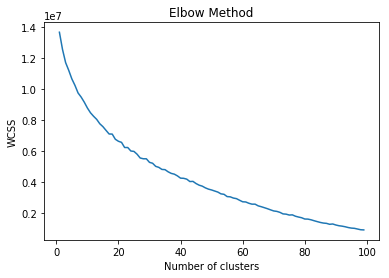

In [944]:
wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(results_mod.iloc[:,3:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [945]:
kmeans = KMeans(n_clusters=40, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(results_mod.iloc[:,3:-1])

kmeans_results = results_mod.copy()
kmeans_results['kmeans'] = pred_y
kmeans_results['addition'] = kmeans_results['average_electricity_price'] + kmeans_results['carbon_emitted']

In [946]:
# kmeans_results.kmeans

len(kmeans_results[kmeans_results.kmeans.duplicated(keep=False)])

157

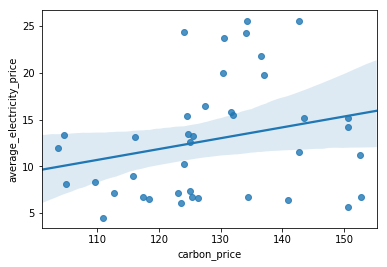

In [947]:
kmeans_results_long = kmeans_results.melt(value_name='carbon_price', id_vars=['id','average_electricity_price','carbon_emitted','kmeans'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])
kmeans_avg = kmeans_results_long.groupby("kmeans")[['carbon_price','average_electricity_price','carbon_emitted']].mean()

kmeans_avg['combined'] = kmeans_avg['average_electricity_price'] + kmeans_avg['carbon_emitted']
sns.regplot(data=kmeans_avg, y='average_electricity_price', x='carbon_price')

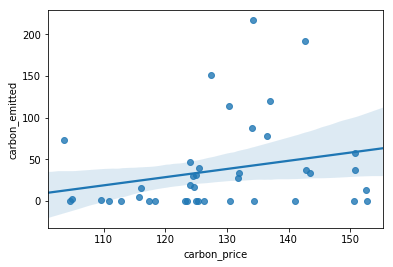

In [948]:
sns.regplot(data=kmeans_avg, y='carbon_emitted', x='carbon_price')

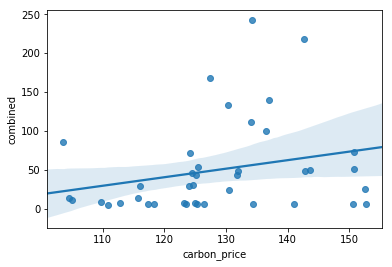

In [949]:
sns.regplot(data=kmeans_avg, y='combined', x='carbon_price')

In [950]:
kmeans_describe = kmeans_results_long.groupby("kmeans")[['carbon_price','average_electricity_price','carbon_emitted']].describe()
# sns.lineplot(data=kmeans_describe, y='carbon_price', x='average_electricity_price')
kmeans_describe

carbon_price                                                                                   average_electricity_price                                                                              carbon_emitted                                                                                    
              count        mean        std        min         25%         50%         75%         max                     count       mean        std        min        25%        50%        75%        max          count        mean         std         min         25%         50%         75%         max
kmeans                                                                                                                                                                                                                                                                                                         
0              68.0  150.571979  70.048162   2.796900  105.789682  156.320160  207.424786  246.416611                      68.0   5.662001   2.123724   4.041183   4.104490   4.695438   6.252949   9.215947           68.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
1             119.0  152.678468  72.027288   4.041417   95.715309  171.858871  216.365311  249.146271                     119.0   6.685138   2.000474   4.105935   4.359230   6.447614   8.579289  10.040091          119.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
2             119.0  123.502131  64.528369   6.552192   80.253838  113.895721  172.154678  249.324356                     119.0   6.095297   1.607728   3.528399   5.142792   5.651115   7.352586   8.699091          119.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
3             119.0  124.085934  62.958129   4.075459   80.501259  124.660019  164.705879  249.037048                     119.0  24.377272  29.037044   4.204944   6.752700   9.111672  26.247860  92.614339          119.0   47.005768   95.636322    0.000000    0.000000    0.000000   53.121952  275.918427
4              85.0  130.345090  60.508794   7.342966   82.413788  138.042221  172.052750  241.811096                      85.0  20.018226   7.445888   5.303285  22.250440  23.775201  24.028626  24.733576           85.0  113.637564  110.732004    0.000000   65.125000   73.672997  106.765984  322.623840
5              68.0  118.385517  72.951495   7.539859   52.568238  114.738873  175.622284  246.676651                      68.0   6.529599   0.711579   5.704144   5.987421   6.429343   6.971520   7.555565           68.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
6              34.0  109.650272  78.027294   5.642202   27.481386  132.266113  170.624138  240.643692                      34.0   8.366407   2.633963   5.771468   5.771468   8.366407  10.961346  10.961346           34.0    0.787802    0.799650    0.000000    0.000000    0.787802    1.575605    1.575605
7              68.0  117.361759  70.068792   5.041587   57.252703  113.126316  174.443020  249.146271                      68.0   6.752760   1.001842   5.739503   6.251567   6.433941   6.935133   8.403655           68.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
8             119.0  124.989401  75.332766   0.037002   71.342903  107.668091  192.730530  248.503677                     119.0   7.348685   1.717575   4.616538   5.713860   7.709199   8.903005   9.613738          119.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
9             102.0  124.647392  71.726141   3.652080   69.281357  122.197365  180.113060  246.362213                     102.0  13.452690  13.781091   5.929715   6.706380   7.478122   9.087872  44.035928          102.0   16.965421   38.123173    0.000000    0.000000    0.000000    0.000000  101.792526
10             34.0  134.249217  70.469430  11.023003  

In [951]:
kmeans_describe.columns = ['_'.join(col).strip() for col in kmeans_describe.columns.values]
kmeans_describe.head()

carbon_price_count  carbon_price_mean  carbon_price_std  carbon_price_min  carbon_price_25%  carbon_price_50%  carbon_price_75%  carbon_price_max  average_electricity_price_count  average_electricity_price_mean  average_electricity_price_std  average_electricity_price_min  average_electricity_price_25%  average_electricity_price_50%  average_electricity_price_75%  average_electricity_price_max  carbon_emitted_count  carbon_emitted_mean  carbon_emitted_std  carbon_emitted_min  carbon_emitted_25%  carbon_emitted_50%  carbon_emitted_75%  carbon_emitted_max
kmeans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
0                     68.0         150.571979         70.048162          2.796900        105.789682        156.320160        207.424786        246.416611                             68.0                        5.662001                       2.123724                       4.041183                       4.104490                       4.695438                       6.252949                       9.215947                  68.0             0.000000            0.000000                 0.0               0.000            0.000000            0.000000            0.000000
1                    119.0         152.678468         72.027288          4.041417         95.715309        171.858871        216.365311        249.146271                            119.0                        6.685138                       2.000474                       4.105935                       4.359230                       6.447614                       8.579289                      10.040091                 119.0             0.000000            0.000000                 0.0               0.000            0.000000            0.000000            0.000000
2                    119.0         123.502131         64.528369          6.552192         80.253838        113.895721        172.154678        249.324356                            119.0                        6.095297                       1.607728                       3.528399                       5.142792                       5.651115                       7.352586                       8.699091                 119.0             0.000000            0.000000                 0.0               0.000            0.000000            0.000000            0.000000
3                    119.0         124.085934         62.958129          4.075459         80.501259        124.660019        164.705879        249.037048                            119.0                       24.377272                      29.037044                       4.204944                       6.752700                       9.111672                      26.247860                      92.614339                 119.0            47.005768           95.636322                 0.0               0.000            0.000000           53.121952          275.918427
4                     85.0         130.345090         60.508794          7.342966         82.413788        138.042221        172.052750        241.811096                             85.0                       20.018226                       7.445888                       5.303285                      22.250440                      23.775201                      24.028626                      24.733576                  85.0           113.637564          110.732004                 0.0              65.125           73.672997          106.765984          322.623840

In [952]:
# for cols in kmeans_describe.columns:
#     for dependent_var in ['carbon_price_mean','carbon_price_std','carbon_price_min','carbon_price_25%','carbon_price_50%','carbon_price_75%','carbon_price_max']:
#         sns.regplot(lowess=False, robust=True, data=kmeans_describe, x=dependent_var, y=cols)
#         plt.show()
#         plt.close()

In [953]:
# kmeans_described_long = kmeans_describe.melt(id_vars=['carbon_price_mean'], value_vars=['average_electricity_price_mean','average_electricity_price_min'])
# kmeans_described_long
# sns.scatterplot(data=kmeans_described_long, hue='variable',y='value',x='carbon_price_mean')

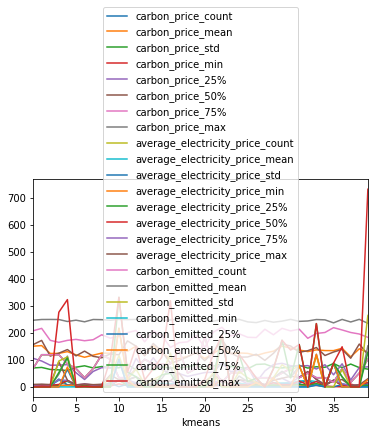

In [954]:
kmeans_describe.plot()

In [955]:
pd.set_option('display.max_columns', None)

kmeans_results.groupby('kmeans').describe()

id                                                              average_electricity_price                                                                              carbon_emitted                                                                                     carbon_2                                                                                    carbon_3                                                                                     carbon_4                                                                                    carbon_5                                                                                     carbon_6                                                                                    carbon_7                                                                                     carbon_8                                                                                    carbon_9                                                                                    carbon_10                                                                                    carbon_11                                                                                     carbon_12                                                                                    carbon_13                                                                                    carbon_14                                                                                     carbon_15                                                                                    carbon_16                                                                                     carbon_17                                                                                    carbon_18                                                                                    run_number                                                addition                                                                                    
       count        mean         std    min     25%    50%     75%    max                     count       mean        std        min        25%        50%        75%        max          count        mean         std         min         25%         50%         75%         max    count        mean        std         min         25%         50%         75%         max    count        mean         std         min         25%         50%         75%         max    count        mean        std         min         25%         50%         75%         max    count        mean         std         min         25%         50%         75%         max    count        mean        std         min         25%         50%         75%         max    count        mean         std         min         25%         50%         75%         max    count        mean        std         min         25%         50%         75%         max    count        mean        std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max     count        mean         std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max     count        mean         std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max     count        mean         std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max     count        mean        std         min         25%         50%         75%         max      count      mean       std  min   25%  50%   75%  max    count        mean         std         min         25%         50%         75%         ma

In [956]:
cluster_dat = kmeans_results.groupby('kmeans')[['average_electricity_price','carbon_emitted']].median()
cluster_dat['addition'] = cluster_dat.average_electricity_price + cluster_dat.carbon_emitted
cluster_dat.sort_values('addition')

average_electricity_price  carbon_emitted    addition
kmeans                                                       
37                       4.497471        0.000000    4.497471
0                        4.695438        0.000000    4.695438
2                        5.651115        0.000000    5.651115
16                       5.673331        0.000000    5.673331
19                       6.292337        0.000000    6.292337
5                        6.429343        0.000000    6.429343
7                        6.433941        0.000000    6.433941
1                        6.447614        0.000000    6.447614
36                       6.506432        0.000000    6.506432
21                       6.596878        0.000000    6.596878
14                       6.685415        0.000000    6.685415
27                       6.723173        0.000000    6.723173
34                       6.748470        0.000000    6.748470
24                       6.828566        0.000000    6.828566
20                       6.901496        0.000000    6.901496
12                       7.006482        0.000000    7.006482
38                       7.156151        0.000000    7.156151
13                       7.331492        0.000000    7.331492
9                        7.478122        0.000000    7.478122
25                       7.577943        0.000000    7.577943
29                       7.631643        0.000000    7.631643
32                       7.652561        0.000000    7.652561
23                       7.668714        0.000000    7.668714
8                        7.709199        0.000000    7.709199
15                       7.751792        0.000000    7.751792
18                       8.037814        0.000000    8.037814
30                       8.153676        0.000000    8.153676
17                       8.402521        0.000000    8.402521
3                        9.111672        0.000000    9.111672
6                        8.366407        0.787802    9.154210
26                      13.191760       16.018648   29.210408
39                      16.143492       26.239668   42.383160
11                      15.840224       27.254211   43.094435
28                      15.525712       33.619156   49.144868
4                       23.775201       73.672997   97.448198
31                      21.862660       78.305740  100.168400
35                      24.244416       87.708664  111.953080
33                      19.823973      120.397781  140.221754
22                      25.551261      192.198776  217.750038
10                      25.606955      216.626896  242.233851

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
0                        4.695438             0.0  4.695438
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000            68.0   68.000000  68.000000
mean   157.250000                   5.662001             0.0  150.571979  10.000000
std    194.691058                   2.123724             0.0   70.048162   4.935404
min      3.000000                   4.041183             0.0    2.796900   2.000000
25%      4.500000                   4.104490             0.0  105.789682   6.000000
50%     74.500000                   4.695438             0.0  156.320160  10.000000
75%    227.250000                   6.252949             0.0  207.424786  14.000000
max    477.000000                   9.215947             0.0  246.416611  18.000000


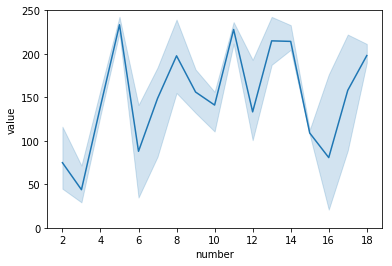

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
2                        5.651115             0.0  5.651115
               id  average_electricity_price  carbon_emitted       value      number
count  119.000000                 119.000000           119.0  119.000000  119.000000
mean    61.857143                   6.095297             0.0  123.502131   10.000000
std     69.272893                   1.607728             0.0   64.528369    4.919694
min      1.000000                   3.528399             0.0    6.552192    2.000000
25%     22.000000                   5.142792             0.0   80.253838    6.000000
50%     29.000000                   5.651115             0.0  113.895721   10.000000
75%     71.000000                   7.352586             0.0  172.154678   14.000000
max    221.000000                   8.699091             0.0  249.324356   18.000000


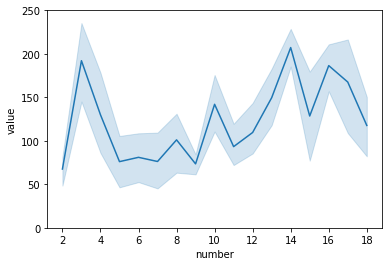

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
16                       5.673331             0.0  5.673331
               id  average_electricity_price  carbon_emitted       value     number
count   85.000000                  85.000000       85.000000   85.000000  85.000000
mean    79.000000                  11.929211       73.838340  103.601893  10.000000
std     85.387213                   8.565747      124.677933   69.671711   4.928054
min      6.000000                   4.188477        0.000000    3.146222   2.000000
25%     20.000000                   5.101402        0.000000   49.782009   6.000000
50%     31.000000                   5.673331        0.000000   87.411041  10.000000
75%    103.000000                  22.196804       50.585041  145.989166  14.000000
max    235.000000                  22.486041      318.606659  247.544968  18.000000


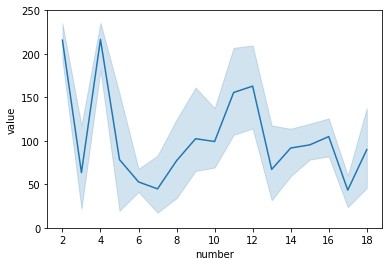

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
19                       6.292337             0.0  6.292337
              id  average_electricity_price  carbon_emitted       value     number
count   68.00000                  68.000000            68.0   68.000000  68.000000
mean   115.00000                   6.597993             0.0  126.351805  10.000000
std    128.63845                   1.039981             0.0   81.668628   4.935404
min     30.00000                   5.652164             0.0    3.013596   2.000000
25%     31.50000                   5.671032             0.0   46.109365   6.000000
50%     47.50000                   6.292337             0.0  127.477005  10.000000
75%    131.00000                   7.219299             0.0  189.970650  14.000000
max    335.00000                   8.155135             0.0  246.966003  18.000000


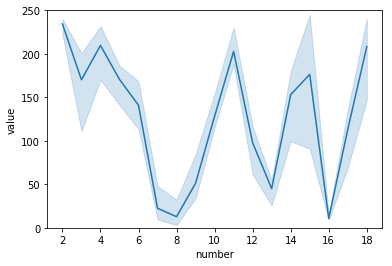

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
5                        6.429343             0.0  6.429343
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000            68.0   68.000000  68.000000
mean    84.000000                   6.529599             0.0  118.385517  10.000000
std     68.055947                   0.711579             0.0   72.951495   4.935404
min     33.000000                   5.704144             0.0    7.539859   2.000000
25%     42.000000                   5.987421             0.0   52.568238   6.000000
50%     51.500000                   6.429343             0.0  114.738873  10.000000
75%     93.500000                   6.971520             0.0  175.622284  14.000000
max    200.000000                   7.555565             0.0  246.676651  18.000000


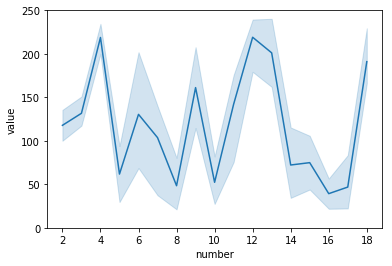

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
7                        6.433941             0.0  6.433941
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000            68.0   68.000000  68.000000
mean    87.250000                   6.752760             0.0  117.361759  10.000000
std     54.886144                   1.001842             0.0   70.068792   4.935404
min     36.000000                   5.739503             0.0    5.041587   2.000000
25%     48.750000                   6.251567             0.0   57.252703   6.000000
50%     68.000000                   6.433941             0.0  113.126316  10.000000
75%    106.500000                   6.935133             0.0  174.443020  14.000000
max    177.000000                   8.403655             0.0  249.146271  18.000000


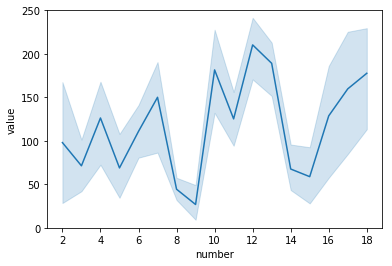

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
1                        6.447614             0.0  6.447614
               id  average_electricity_price  carbon_emitted       value      number
count  119.000000                 119.000000           119.0  119.000000  119.000000
mean   245.714286                   6.685138             0.0  152.678468   10.000000
std    156.616131                   2.000474             0.0   72.027288    4.919694
min      4.000000                   4.105935             0.0    4.041417    2.000000
25%     86.000000                   4.359230             0.0   95.715309    6.000000
50%    249.000000                   6.447614             0.0  171.858871   10.000000
75%    406.000000                   8.579289             0.0  216.365311   14.000000
max    480.000000                  10.040091             0.0  249.146271   18.000000


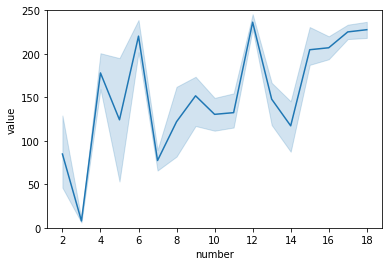

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
36                       6.506432             0.0  6.506432
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000       68.000000   68.000000  68.000000
mean    94.750000                  11.525247       37.091583  142.733914  10.000000
std     53.386335                   9.174880       64.722168   71.238253   4.935404
min     39.000000                   5.797197        0.000000    0.311432   2.000000
25%     51.000000                   6.258480        0.000000   85.416616   6.000000
50%     83.000000                   6.506432        0.000000  138.561623  10.000000
75%    126.750000                  11.773198       37.091583  210.489799  14.000000
max    174.000000                  27.290927      148.366333  249.450592  18.000000


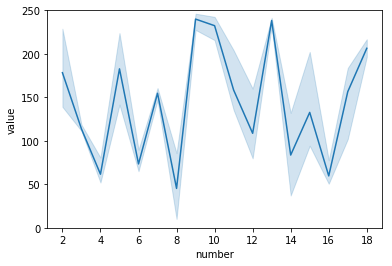

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
21                       6.596878             0.0  6.596878
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000       68.000000   68.000000  68.000000
mean    87.000000                  15.382461       30.511908  124.489964  10.000000
std     76.296163                  16.739337       53.241103   76.571084   4.935404
min      8.000000                   4.245747        0.000000    4.355389   2.000000
25%     23.000000                   5.298122        0.000000   54.289774   6.000000
50%     70.500000                   6.596878        0.000000  128.514797  10.000000
75%    134.500000                  16.681217       30.511908  202.429855  14.000000
max    199.000000                  44.090341      122.047630  242.503860  18.000000


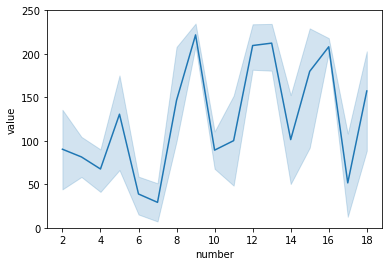

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
14                       6.685415             0.0  6.685415
               id  average_electricity_price  carbon_emitted       value     number
count   85.000000                  85.000000       85.000000   85.000000  85.000000
mean   111.600000                  11.176931       13.682092  152.539875  10.000000
std     94.464934                   8.278870       26.741152   61.332746   4.928054
min     19.000000                   5.087523        0.000000    4.703574   2.000000
25%     56.000000                   6.084820        0.000000  108.102158   6.000000
50%     88.000000                   6.685415        0.000000  160.443466  10.000000
75%    105.000000                  10.869112        1.575605  206.774216  14.000000
max    290.000000                  27.157787       66.834854  247.327179  18.000000


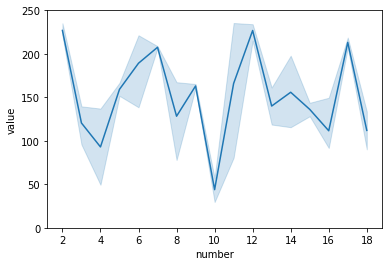

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
24                       6.828566             0.0  6.828566
               id  average_electricity_price  carbon_emitted       value     number
count   51.000000                  51.000000       51.000000   51.000000  51.000000
mean    73.333333                  13.299467       40.015361  125.444507  10.000000
std     24.975722                   9.547732       57.153367   72.569060   4.947727
min     52.000000                   6.403124        0.000000   14.309246   2.000000
25%     52.000000                   6.403124        0.000000   60.479794   6.000000
50%     60.000000                   6.828566        0.000000  109.878021  10.000000
75%    108.000000                  26.666709      120.046082  196.481056  14.000000
max    108.000000                  26.666709      120.046082  249.691071  18.000000


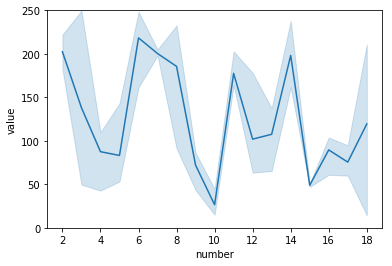

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
20                       6.901496             0.0  6.901496
               id  average_electricity_price  carbon_emitted       value      number
count  187.000000                 187.000000      187.000000  187.000000  187.000000
mean    60.818182                   8.129262        2.728320  104.954313   10.000000
std     18.108071                   3.840743        8.074062   63.680826    4.912131
min     34.000000                   5.707798        0.000000    0.251255    2.000000
25%     46.000000                   6.082095        0.000000   53.112116    6.000000
50%     62.000000                   6.901496        0.000000   96.797386   10.000000
75%     70.000000                   7.313974        0.000000  146.470123   14.000000
max     92.000000                  19.300350       28.135799  249.750687   18.000000


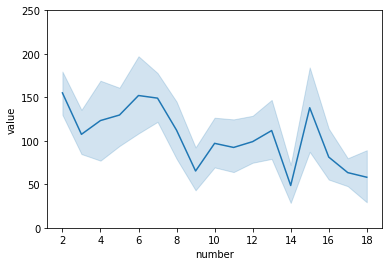

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
12                       7.006482             0.0  7.006482
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000       68.000000   68.000000  68.000000
mean   128.000000                  14.218901       37.503414  150.699601  10.000000
std     86.448846                  13.406566       65.440783   62.492822   4.935404
min     48.000000                   5.640600        0.000000   14.093628   2.000000
25%     68.250000                   5.993827        0.000000  105.444559   6.000000
50%     97.000000                   7.006482        0.000000  150.424789  10.000000
75%    156.750000                  15.231556       37.503414  208.561508  14.000000
max    270.000000                  37.222039      150.013657  249.527405  18.000000


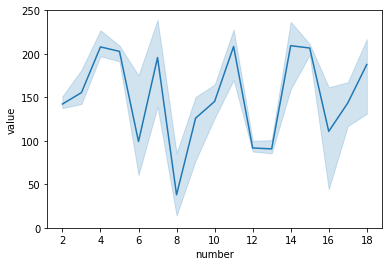

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
38                       7.156151             0.0  7.156151
              id  average_electricity_price  carbon_emitted       value     number
count  51.000000                  51.000000            51.0   51.000000  51.000000
mean   49.666667                   6.428237             0.0  140.947878  10.000000
std    25.474432                   1.128127             0.0   71.260821   4.947727
min    14.000000                   4.850121             0.0    0.213867   2.000000
25%    14.000000                   4.850121             0.0   71.590847   6.000000
50%    67.000000                   7.156151             0.0  158.401917  10.000000
75%    68.000000                   7.278438             0.0  195.507835  14.000000
max    68.000000                   7.278438             0.0  249.691071  18.000000


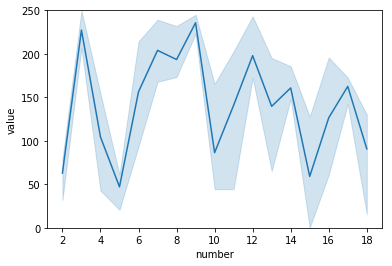

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
13                       7.331492             0.0  7.331492
               id  average_electricity_price  carbon_emitted       value      number
count  102.000000                 102.000000      102.000000  102.000000  102.000000
mean   105.000000                   8.923564        4.376680  115.712870   10.000000
std     78.025764                   5.098697        9.834883   67.531797    4.923172
min     15.000000                   4.881375        0.000000    5.463437    2.000000
25%     50.000000                   6.229048        0.000000   59.847442    6.000000
50%     72.500000                   7.331492        0.000000  115.360954   10.000000
75%    189.000000                   7.707012        0.000000  166.654800   14.000000
max    231.000000                  20.060963       26.260080  248.988083   18.000000


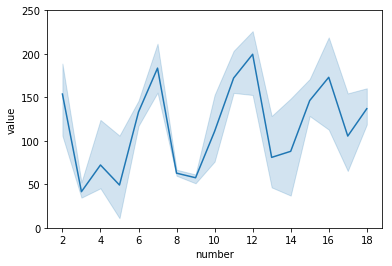

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
9                        7.478122             0.0  7.478122
               id  average_electricity_price  carbon_emitted       value      number
count  102.000000                 102.000000      102.000000  102.000000  102.000000
mean   115.833333                  13.452690       16.965421  124.647392   10.000000
std     68.363919                  13.781091       38.123173   71.726141    4.923172
min     40.000000                   5.929715        0.000000    3.652080    2.000000
25%     57.000000                   6.706380        0.000000   69.281357    6.000000
50%     92.500000                   7.478122        0.000000  122.197365   10.000000
75%    191.000000                   9.087872        0.000000  180.113060   14.000000
max    222.000000                  44.035928      101.792526  246.362213   18.000000


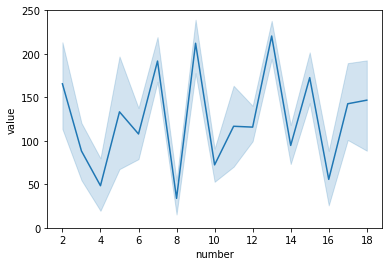

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
25                       7.577943             0.0  7.577943
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000       68.000000   68.000000  68.000000
mean   124.250000                  10.301965       19.435280  124.036815  10.000000
std    129.944233                   7.071034       33.913177   66.780157   4.935404
min      2.000000                   3.909752        0.000000    1.620905   2.000000
25%     44.750000                   6.088655        0.000000   73.473196   6.000000
50%     77.500000                   7.577943        0.000000  110.699066  10.000000
75%    157.000000                  11.791253       19.435280  183.433575  14.000000
max    340.000000                  22.142221       77.741119  240.292191  18.000000


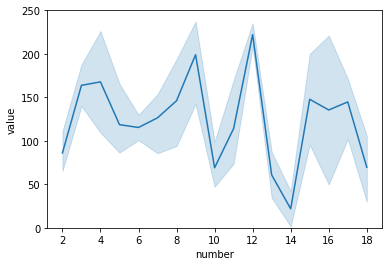

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
29                       7.631643             0.0  7.631643
               id  average_electricity_price  carbon_emitted       value     number
count   51.000000                  51.000000       51.000000   51.000000  51.000000
mean   204.333333                  15.227564       57.531362  150.675748  10.000000
std    174.913655                  11.907387       82.171221   70.092809   4.947727
min     49.000000                   6.171143        0.000000    5.738347   2.000000
25%     49.000000                   6.171143        0.000000   87.301754   6.000000
50%    118.000000                   7.631643        0.000000  158.422714  10.000000
75%    446.000000                  31.879906      172.594086  216.535164  14.000000
max    446.000000                  31.879906      172.594086  243.112488  18.000000


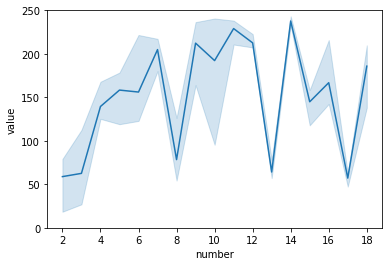

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
32                       7.652561             0.0  7.652561
               id  average_electricity_price  carbon_emitted       value     number
count   51.000000                  51.000000            51.0   51.000000  51.000000
mean   247.333333                  23.761949             0.0  130.543144  10.000000
std    157.077518                  23.274799             0.0   69.661032   4.947727
min     69.000000                   7.280806             0.0    6.581522   2.000000
25%     69.000000                   7.280806             0.0   78.703213   6.000000
50%    225.000000                   7.652561             0.0  133.864578  10.000000
75%    448.000000                  56.352479             0.0  179.685898  14.000000
max    448.000000                  56.352479             0.0  243.693497  18.000000


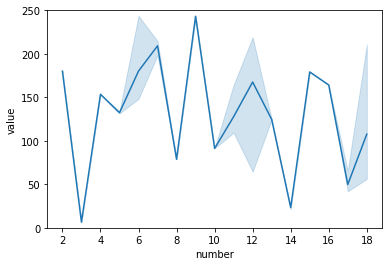

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
23                       7.668714             0.0  7.668714
               id  average_electricity_price  carbon_emitted       value     number
count   51.000000                  51.000000            51.0   51.000000  51.000000
mean   103.333333                   7.125460             0.0  123.130381  10.000000
std     73.896053                   1.164217             0.0   75.685093   4.947727
min     27.000000                   5.522709             0.0    1.292622   2.000000
25%     27.000000                   5.522709             0.0   56.819220   6.000000
50%     81.000000                   7.668714             0.0  125.529503  10.000000
75%    202.000000                   8.184958             0.0  188.507454  14.000000
max    202.000000                   8.184958             0.0  246.322479  18.000000


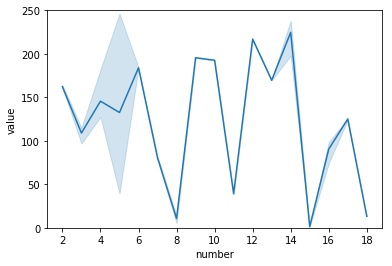

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
8                        7.709199             0.0  7.709199
               id  average_electricity_price  carbon_emitted       value      number
count  119.000000                 119.000000           119.0  119.000000  119.000000
mean   210.285714                   7.348685             0.0  124.989401   10.000000
std    170.124289                   1.717575             0.0   75.332766    4.919694
min     11.000000                   4.616538             0.0    0.037002    2.000000
25%     35.000000                   5.713860             0.0   71.342903    6.000000
50%    219.000000                   7.709199             0.0  107.668091   10.000000
75%    349.000000                   8.903005             0.0  192.730530   14.000000
max    478.000000                   9.613738             0.0  248.503677   18.000000


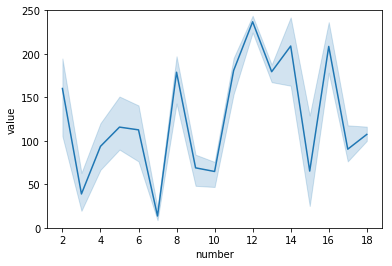

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
15                       7.751792             0.0  7.751792
               id  average_electricity_price  carbon_emitted       value     number
count   85.000000                  85.000000       85.000000   85.000000  85.000000
mean   140.600000                  12.602696       31.001900  125.054249  10.000000
std    160.835852                   7.994286       43.542653   73.846860   4.928054
min     13.000000                   4.689028        0.000000    1.138418   2.000000
25%     44.000000                   6.074587        0.000000   63.494354   6.000000
50%     94.000000                   7.751792        0.000000  131.571884  10.000000
75%     98.000000                  21.575875       44.642136  189.939758  14.000000
max    454.000000                  22.922200      110.367363  243.894821  18.000000


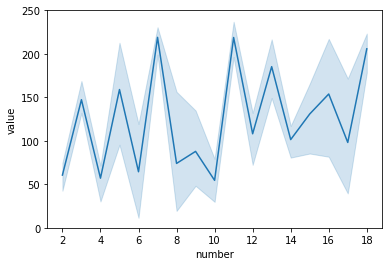

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
18                       8.037814             0.0  8.037814
              id  average_electricity_price  carbon_emitted       value     number
count  51.000000                  51.000000            51.0   51.000000  51.000000
mean   60.000000                   7.186282             0.0  112.744178  10.000000
std    30.843476                   1.566734             0.0   74.560915   4.947727
min    17.000000                   5.009528             0.0    2.314526   2.000000
25%    17.000000                   5.009528             0.0   38.828987   6.000000
50%    78.000000                   8.037814             0.0  111.460213  10.000000
75%    85.000000                   8.511504             0.0  166.528847  14.000000
max    85.000000                   8.511504             0.0  246.263596  18.000000


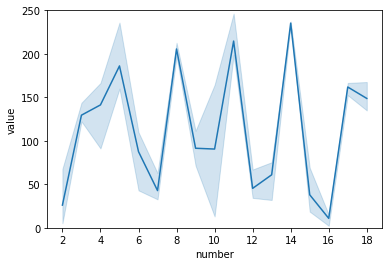

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
30                       8.153676             0.0  8.153676
               id  average_electricity_price  carbon_emitted       value     number
count   68.000000                  68.000000       68.000000   68.000000  68.000000
mean   106.000000                  15.208822       34.045582  143.527012  10.000000
std     65.079056                  14.133207       59.407112   73.933269   4.935404
min     21.000000                   5.122830        0.000000    7.697445   2.000000
25%     70.500000                   7.019926        0.000000   78.278603   6.000000
50%    101.000000                   8.153676        0.000000  151.290764  10.000000
75%    136.500000                  16.342571       34.045582  207.005516  14.000000
max    201.000000                  39.405105      136.182327  249.590805  18.000000


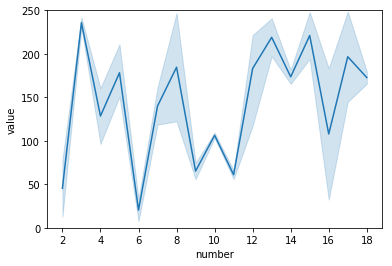

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
17                       8.402521             0.0  8.402521
               id  average_electricity_price  carbon_emitted       value     number
count  136.000000                 136.000000           136.0  136.000000  136.00000
mean   153.750000                  13.351337             0.0  104.523517   10.00000
std    129.225485                  14.462428             0.0   70.234755    4.91709
min     16.000000                   4.956789             0.0    1.036646    2.00000
25%     66.250000                   7.318143             0.0   49.694356    6.00000
50%     83.000000                   8.402521             0.0   97.594803   10.00000
75%    255.500000                   9.943590             0.0  163.390007   14.00000
max    355.000000                  51.224565             0.0  249.593048   18.00000


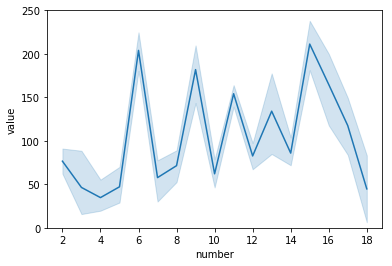

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
3                        9.111672             0.0  9.111672
               id  average_electricity_price  carbon_emitted       value      number
count  119.000000                 119.000000      119.000000  119.000000  119.000000
mean   225.428571                  24.377272       47.005768  124.085934   10.000000
std    158.511699                  29.037044       95.636322   62.958129    4.919694
min      7.000000                   4.204944        0.000000    4.075459    2.000000
25%     97.000000                   6.752700        0.000000   80.501259    6.000000
50%    181.000000                   9.111672        0.000000  124.660019   10.000000
75%    359.000000                  26.247860       53.121952  164.705879   14.000000
max    473.000000                  92.614339      275.918427  249.037048   18.000000


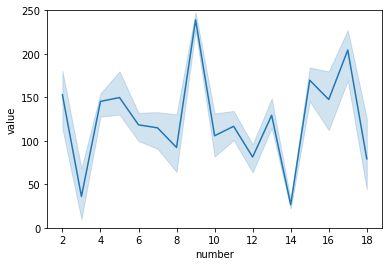

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
39                      16.143492       26.239668  42.38316
               id  average_electricity_price  carbon_emitted       value      number
count  102.000000                 102.000000      102.000000  102.000000  102.000000
mean    89.166667                  16.467038      151.762447  127.370842   10.000000
std     78.519101                  11.386174      264.133597   65.674945    4.923172
min     12.000000                   4.624611        0.000000    6.642238    2.000000
25%     18.000000                   5.032646        0.000000   74.386271    6.000000
50%     76.500000                  16.143492       26.239668  119.490978   10.000000
75%    114.000000                  26.691422      127.577461  183.134888   14.000000
max    238.000000                  30.166565      730.517883  235.058044   18.000000


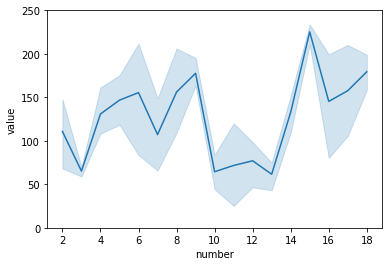

        average_electricity_price  carbon_emitted   addition
kmeans                                                      
4                       23.775201       73.672997  97.448198
               id  average_electricity_price  carbon_emitted       value     number
count   85.000000                  85.000000       85.000000   85.000000  85.000000
mean    85.400000                  20.018226      113.637564  130.345090  10.000000
std     31.087128                   7.445888      110.732004   60.508794   4.928054
min     24.000000                   5.303285        0.000000    7.342966   2.000000
25%     95.000000                  22.250440       65.125000   82.413788   6.000000
50%    100.000000                  23.775201       73.672997  138.042221  10.000000
75%    102.000000                  24.028626      106.765984  172.052750  14.000000
max    106.000000                  24.733576      322.623840  241.811096  18.000000


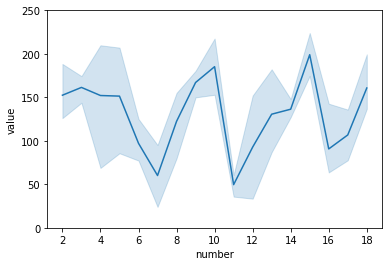

In [957]:
for cluster_num in cluster_dat.sort_values('addition').index:
    cluster_needed = kmeans_results[kmeans_results.kmeans==cluster_num]
    if len(cluster_needed) > 2:
        cluster_needed_long = cluster_needed.melt(id_vars=['id','average_electricity_price','carbon_emitted'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

        cluster_needed_long[['carbon', 'number']] = cluster_needed_long['variable'].str.split('_',expand=True)

        # results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
        cluster_needed_long['number'] = cluster_needed_long['number'].apply(pd.to_numeric, errors='coerce')
        print(cluster_dat[cluster_dat.index==cluster_num])
        print(cluster_needed_long.describe())
        g = sns.lineplot(data=cluster_needed_long, x='number', y='value')
        g.set(ylim=(0, 250))
        plt.show()
        plt.close()

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
0                        4.695438             0.0  4.695438


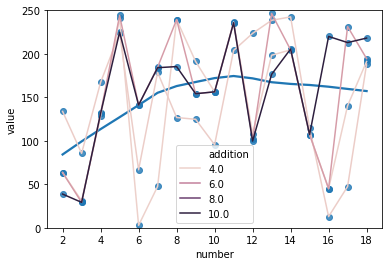

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
2                        5.651115             0.0  5.651115


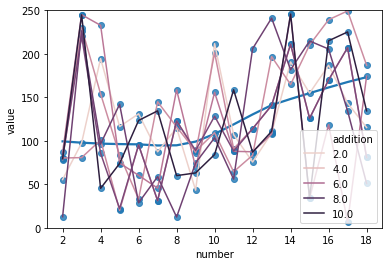

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
16                       5.673331             0.0  5.673331


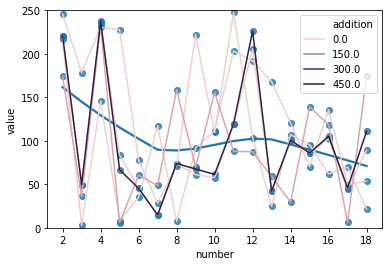

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
19                       6.292337             0.0  6.292337


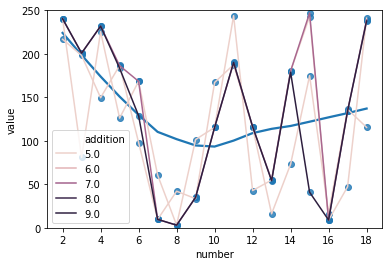

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
5                        6.429343             0.0  6.429343


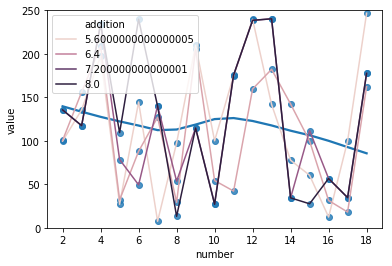

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
7                        6.433941             0.0  6.433941


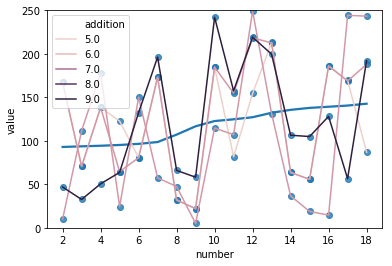

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
1                        6.447614             0.0  6.447614


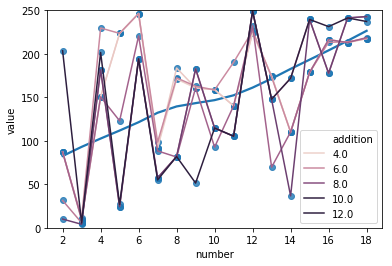

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
36                       6.506432             0.0  6.506432


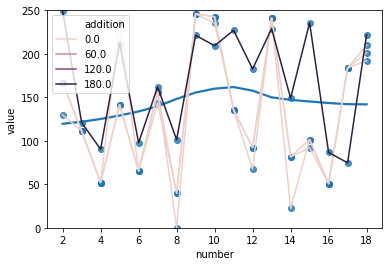

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
21                       6.596878             0.0  6.596878


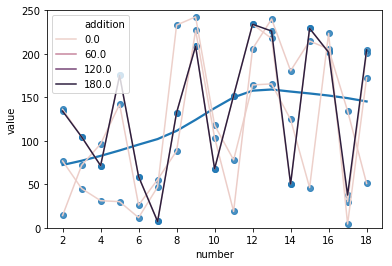

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
14                       6.685415             0.0  6.685415


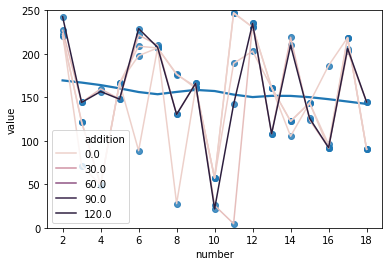

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
24                       6.828566             0.0  6.828566


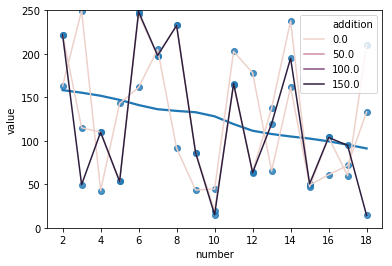

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
20                       6.901496             0.0  6.901496


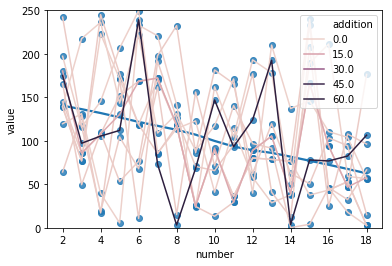

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
12                       7.006482             0.0  7.006482


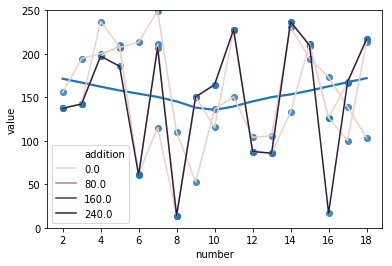

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
38                       7.156151             0.0  7.156151


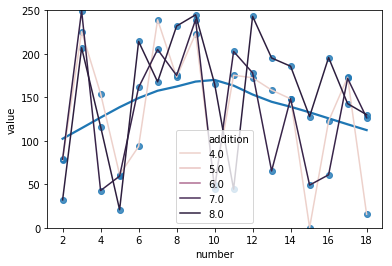

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
13                       7.331492             0.0  7.331492


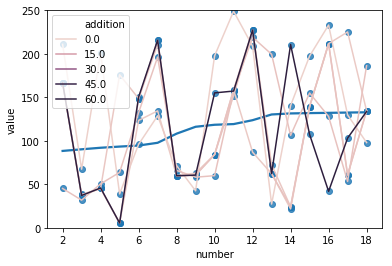

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
9                        7.478122             0.0  7.478122


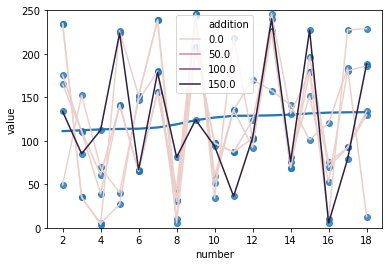

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
25                       7.577943             0.0  7.577943


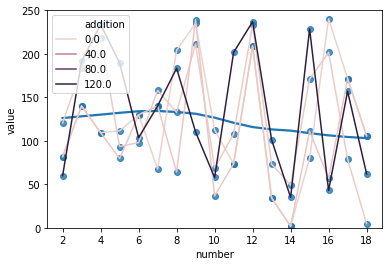

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
29                       7.631643             0.0  7.631643


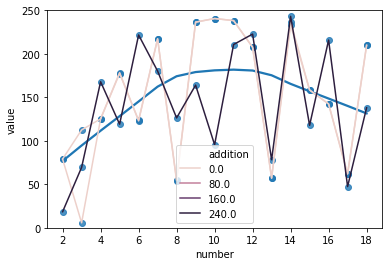

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
32                       7.652561             0.0  7.652561


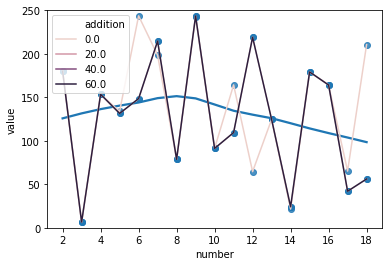

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
23                       7.668714             0.0  7.668714


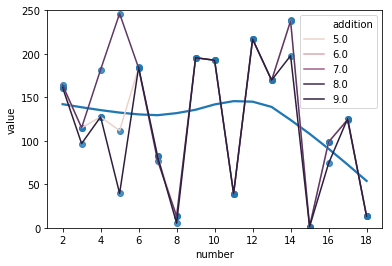

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
8                        7.709199             0.0  7.709199


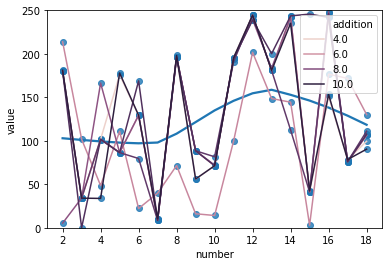

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
15                       7.751792             0.0  7.751792


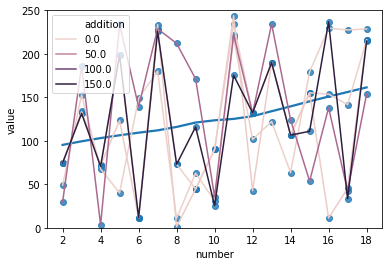

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
18                       8.037814             0.0  8.037814


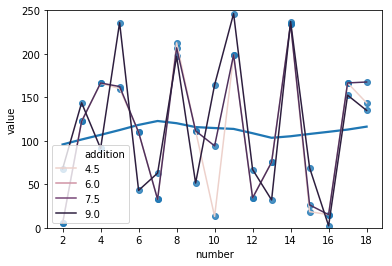

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
30                       8.153676             0.0  8.153676


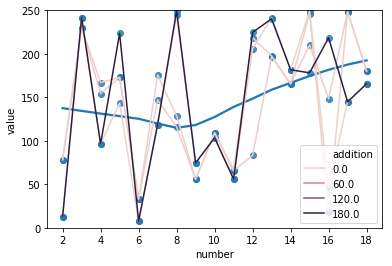

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
17                       8.402521             0.0  8.402521


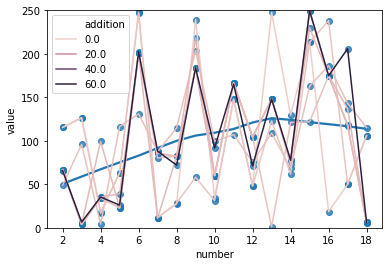

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
3                        9.111672             0.0  9.111672


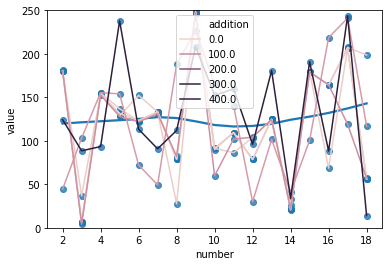

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
39                      16.143492       26.239668  42.38316


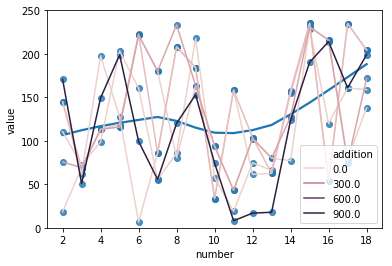

        average_electricity_price  carbon_emitted   addition
kmeans                                                      
4                       23.775201       73.672997  97.448198


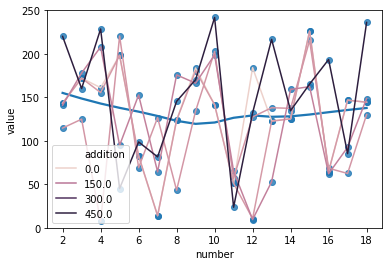

In [958]:
for cluster_num in cluster_dat.sort_values('addition').index:
    cluster_needed = kmeans_results[kmeans_results.kmeans==cluster_num]
    if len(cluster_needed) > 2:
        cluster_needed_long = cluster_needed.melt(id_vars=['id','average_electricity_price','carbon_emitted', 'addition'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

        cluster_needed_long[['carbon', 'number']] = cluster_needed_long['variable'].str.split('_',expand=True)

        # results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
        cluster_needed_long['number'] = cluster_needed_long['number'].apply(pd.to_numeric, errors='coerce')
        print(cluster_dat[cluster_dat.index==cluster_num])
#         print(cluster_needed_long.describe())
#         print(cluster_needed_long)
        g = sns.regplot(data=cluster_needed_long, x='number', y='value', lowess=True)
        g = sns.lineplot(data=cluster_needed_long, x='number', y='value', hue="addition")
        g.set(ylim=(0, 250))
        plt.show()
        plt.close()

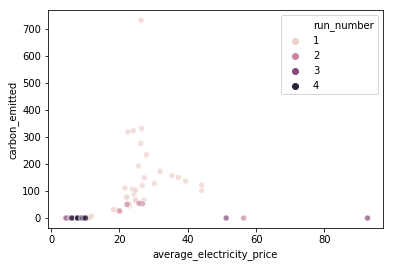

In [959]:
sns.scatterplot(data=results_mod, y='carbon_emitted', x='average_electricity_price', hue='run_number', alpha=0.7)

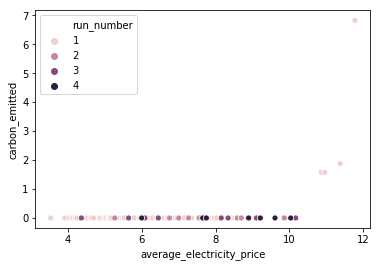

In [960]:
sns.scatterplot(data=results_mod[(results_mod.average_electricity_price < 15) & (results_mod.carbon_emitted < 100)], y='carbon_emitted', x='average_electricity_price', hue='run_number')
# results_mod[(results_mod.average_electricity_price < 5) & (results_mod.carbon_emitted < 100)]

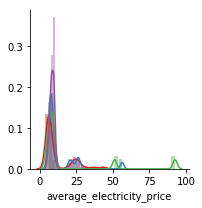

In [961]:
g = sns.FacetGrid(results_mod, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "average_electricity_price"))

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


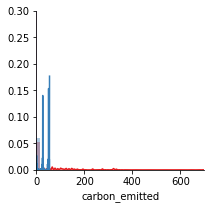

In [962]:
g = sns.FacetGrid(results_mod, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "carbon_emitted"))
g.set(ylim=(0, 0.3), xlim=(0,700))

In [963]:
results_mod = results_mod.melt(id_vars=['id','average_electricity_price','carbon_emitted','run_number'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

results_mod[['carbon', 'number']] = results_mod['variable'].str.split('_',expand=True)

# results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
results_mod['number'] = results_mod['number'].apply(pd.to_numeric, errors='coerce')
results_mod

id  average_electricity_price  carbon_emitted  run_number   variable       value  carbon  number
0       1.0                   3.528399        0.000000           1   carbon_2   55.460709  carbon       2
1       2.0                   3.909752        0.000000           1   carbon_2   81.836662  carbon       2
2       3.0                   4.041183        0.000000           1   carbon_2   63.487507  carbon       2
3       4.0                   4.105935        0.000000           1   carbon_2   87.185364  carbon       2
4       5.0                   4.125593        0.000000           1   carbon_2  133.796646  carbon       2
5       6.0                   4.188477        0.000000           1   carbon_2  245.597717  carbon       2
6       7.0                   4.204944        0.000000           1   carbon_2  180.145035  carbon       2
7       8.0                   4.245747        0.000000           1   carbon_2  136.233032  carbon       2
8      10.0                   4.497471        0.000000           1   carbon_2  129.699692  carbon       2
9      11.0                   4.616538        0.000000           1   carbon_2  180.176987  carbon       2
10     12.0                   4.624611        0.000000           1   carbon_2   18.471615  carbon       2
11     13.0                   4.689028        0.000000           1   carbon_2   74.806961  carbon       2
12     14.0                   4.850121        0.000000           1   carbon_2   77.845070  carbon       2
13     15.0                   4.881375        0.000000           1   carbon_2  210.870987  carbon       2
14     16.0                   4.956789        0.000000           1   carbon_2   66.787064  carbon       2
15     17.0                   5.009528        0.000000           1   carbon_2    5.261368  carbon       2
16     18.0                   5.032646        0.000000           1   carbon_2  144.726105  carbon       2
17     19.0                   5.087523        0.000000           1   carbon_2  220.840912  carbon       2
18     20.0                   5.101402        0.000000           1   carbon_2  217.186646  carbon       2
19     21.0                   5.122830        0.000000           1   carbon_2   12.675558  carbon       2
20     22.0                   5.142792        0.000000           1   carbon_2   78.278603  carbon       2
21     23.0                   5.176452        0.000000           1   carbon_2   80.253838  carbon       2
22     24.0                   5.303285        0.000000           1   carbon_2  143.256058  carbon       2
23     25.0                   5.338287        0.000000           1   carbon_2  222.754013  carbon       2
24     26.0                   5.475356        0.000000           1   carbon_2   61.290028  carbon       2
25     27.0                   5.522709        0.000000           1   carbon_2  161.231781  carbon       2
26     28.0                   5.648914        0.000000           1   carbon_2   76.820824  carbon       2
27     29.0                   5.651115        0.000000           1   carbon_2   86.720284  carbon       2
28     30.0                   5.652164        0.000000           1   carbon_2  240.319031  carbon       2
29     31.0                   5.673331        0.000000           1   carbon_2  220.854630  carbon       2
...     ...                        ...             ...         ...        ...         ...     ...     ...
2690  213.0                   8.339606        0.000000           2  carbon_18  235.974503  carbon      18
2691  219.0                   8.592398        0.000000           2  carbon_18  111.094566  carbon      18
2692  221.0                   8.699091        0.000000           2  carbon_18  134.500992  carbon      18
2693  222.0                   9.087872        0.000000           2  carbon_18   12.870087  carbon      18
2694  223.0                   9.866096        0.000000           2  carbon_18    6.443376  carbon      18
2695  225.0                  56.352479        0.000000           2  carbon_18   56.1411

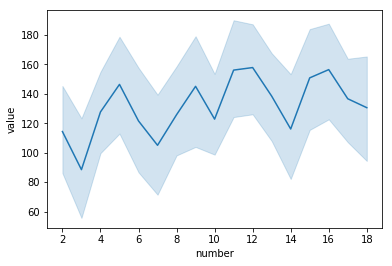

In [964]:
less_than_5 = results_mod[(results_mod.average_electricity_price < 5) & (results_mod.carbon_emitted < 100)]
sns.lineplot(data=less_than_5, x='number', y='value')

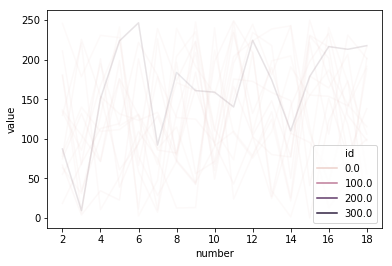

In [965]:
sns.lineplot(data=less_than_5, x='number', y='value', hue='id', alpha=0.1)

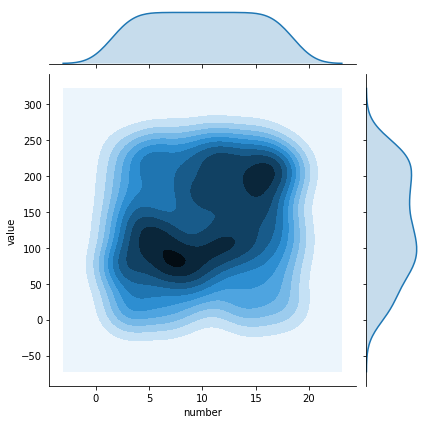

In [966]:
sns.jointplot(data=less_than_5, x='number', y='value', kind='kde')


In [967]:
results_mod['avg_elec_price_bin']=pd.cut(results_mod.average_electricity_price, 50)
results_mod

id  average_electricity_price  carbon_emitted  run_number   variable       value  carbon  number avg_elec_price_bin
0       1.0                   3.528399        0.000000           1   carbon_2   55.460709  carbon       2      (3.439, 5.31]
1       2.0                   3.909752        0.000000           1   carbon_2   81.836662  carbon       2      (3.439, 5.31]
2       3.0                   4.041183        0.000000           1   carbon_2   63.487507  carbon       2      (3.439, 5.31]
3       4.0                   4.105935        0.000000           1   carbon_2   87.185364  carbon       2      (3.439, 5.31]
4       5.0                   4.125593        0.000000           1   carbon_2  133.796646  carbon       2      (3.439, 5.31]
5       6.0                   4.188477        0.000000           1   carbon_2  245.597717  carbon       2      (3.439, 5.31]
6       7.0                   4.204944        0.000000           1   carbon_2  180.145035  carbon       2      (3.439, 5.31]
7       8.0                   4.245747        0.000000           1   carbon_2  136.233032  carbon       2      (3.439, 5.31]
8      10.0                   4.497471        0.000000           1   carbon_2  129.699692  carbon       2      (3.439, 5.31]
9      11.0                   4.616538        0.000000           1   carbon_2  180.176987  carbon       2      (3.439, 5.31]
10     12.0                   4.624611        0.000000           1   carbon_2   18.471615  carbon       2      (3.439, 5.31]
11     13.0                   4.689028        0.000000           1   carbon_2   74.806961  carbon       2      (3.439, 5.31]
12     14.0                   4.850121        0.000000           1   carbon_2   77.845070  carbon       2      (3.439, 5.31]
13     15.0                   4.881375        0.000000           1   carbon_2  210.870987  carbon       2      (3.439, 5.31]
14     16.0                   4.956789        0.000000           1   carbon_2   66.787064  carbon       2      (3.439, 5.31]
15     17.0                   5.009528        0.000000           1   carbon_2    5.261368  carbon       2      (3.439, 5.31]
16     18.0                   5.032646        0.000000           1   carbon_2  144.726105  carbon       2      (3.439, 5.31]
17     19.0                   5.087523        0.000000           1   carbon_2  220.840912  carbon       2      (3.439, 5.31]
18     20.0                   5.101402        0.000000           1   carbon_2  217.186646  carbon       2      (3.439, 5.31]
19     21.0                   5.122830        0.000000           1   carbon_2   12.675558  carbon       2      (3.439, 5.31]
20     22.0                   5.142792        0.000000           1   carbon_2   78.278603  carbon       2      (3.439, 5.31]
21     23.0                   5.176452        0.000000           1   carbon_2   80.253838  carbon       2      (3.439, 5.31]
22     24.0                   5.303285        0.000000           1   carbon_2  143.256058  carbon       2      (3.439, 5.31]
23     25.0                   5.338287        0.000000           1   carbon_2  222.754013  carbon       2      (5.31, 7.092]
24     26.0                   5.475356        0.000000           1   carbon_2   61.290028  carbon       2      (5.31, 7.092]
25     27.0                   5.522709        0.000000           1   carbon_2  161.231781  carbon       2      (5.31, 7.092]
26     28.0                   5.648914        0.000000           1   carbon_2   76.820824  carbon       2      (5.31, 7.092]
27     29.0                   5.651115        0.000000           1   carbon_2   86.720284  carbon       2      (5.31, 7.092]
28     30.0                   5.652164        0.000000           1   carbon_2  240.319031  carbon       2      (5.31, 7.092]
29     31.0                   5.673331        0.000000           1   carbon_2  220.854630  carbon       2      (5.31, 7.092]
...     ...                        ...             ...         ...        ...         ...     ...     ...                ...
2690  213

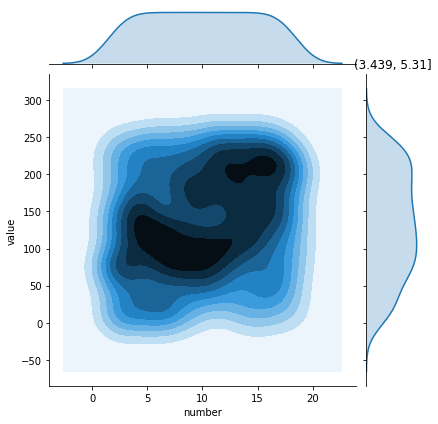

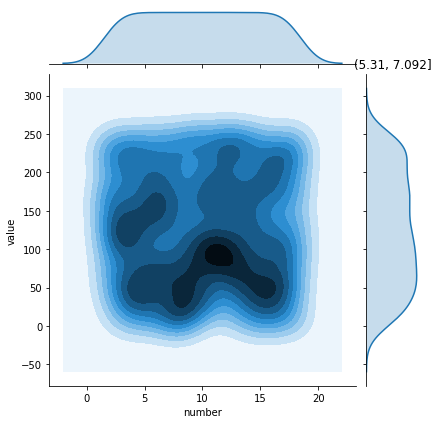

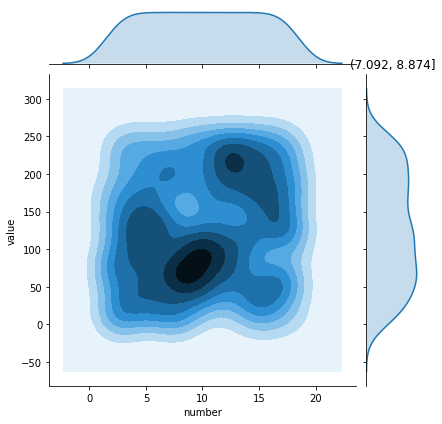

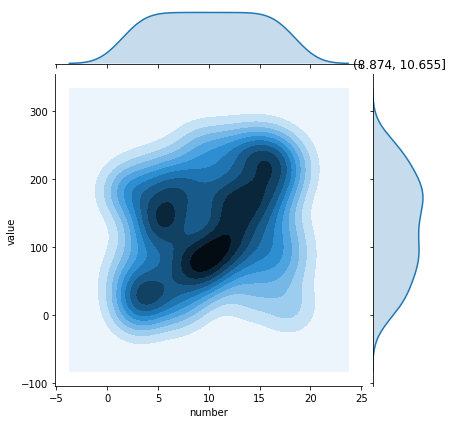

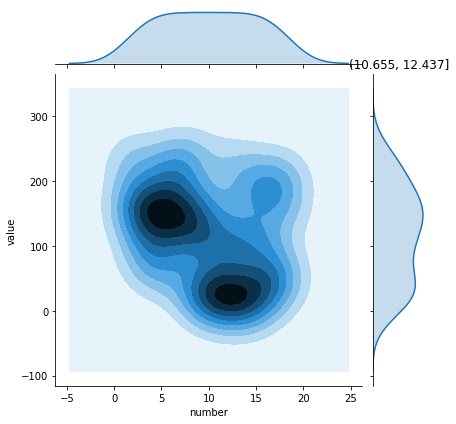

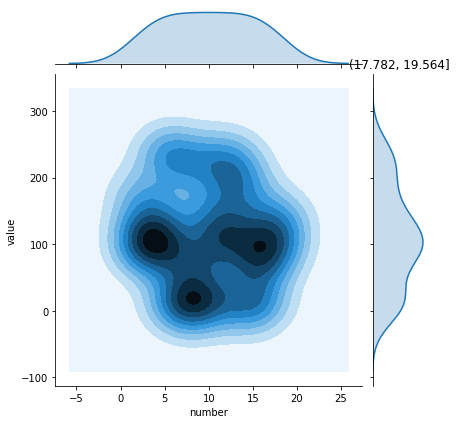

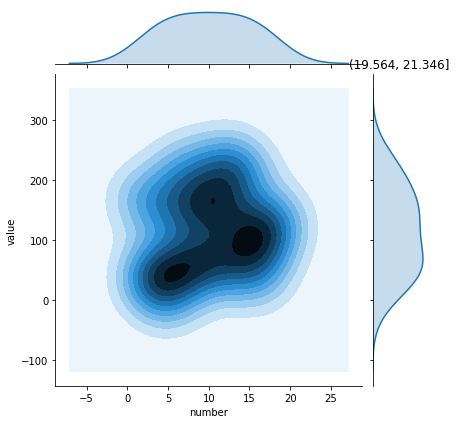

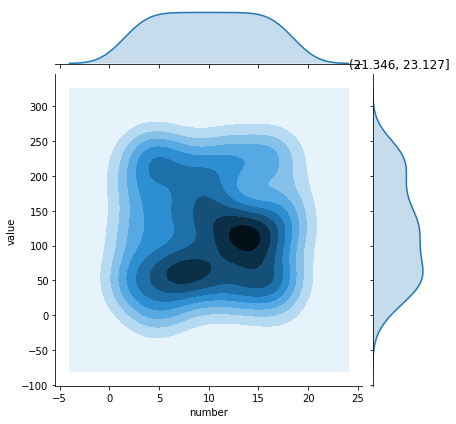

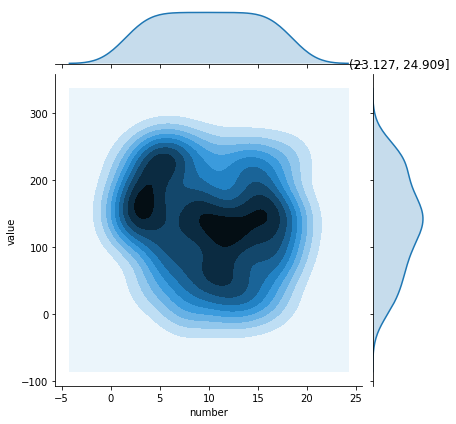

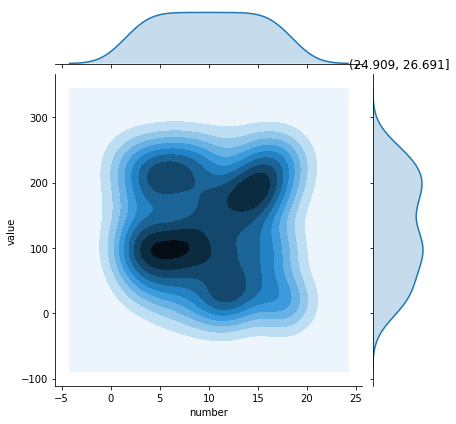

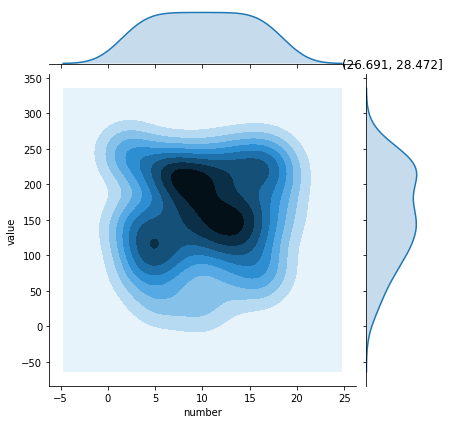

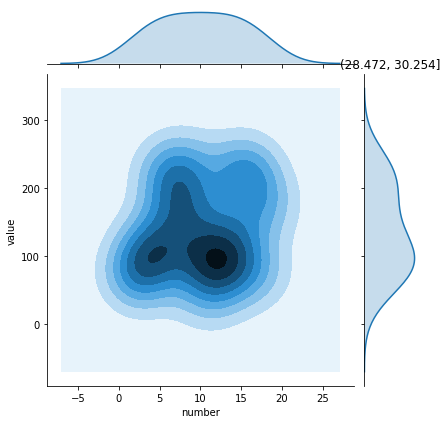

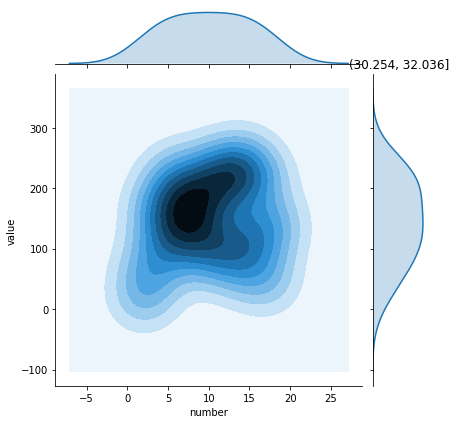

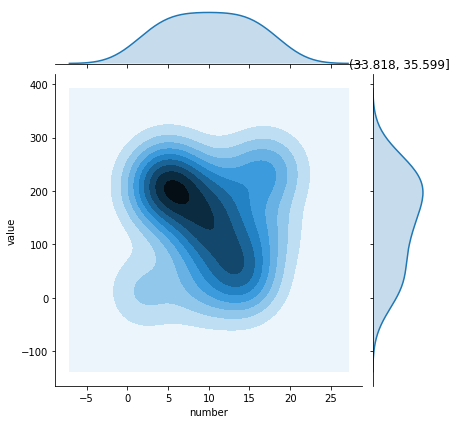

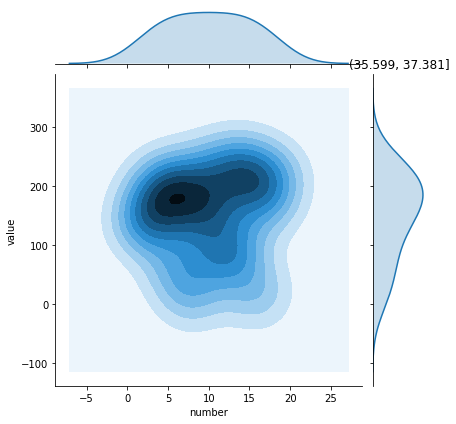

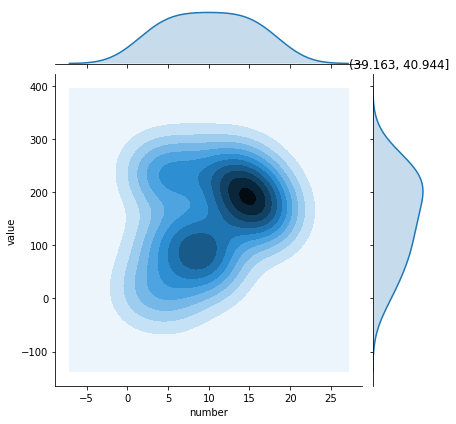

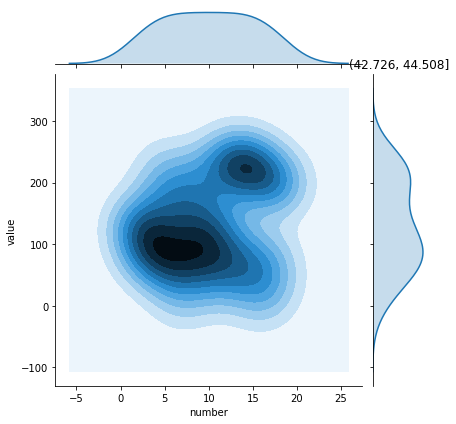

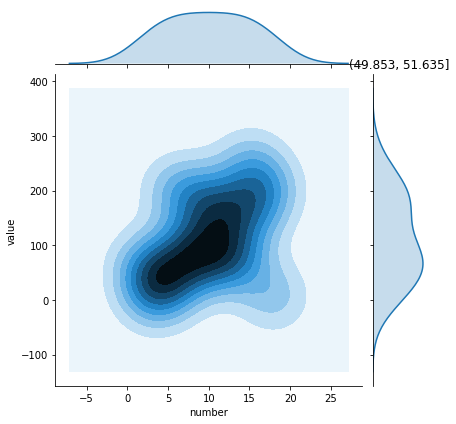

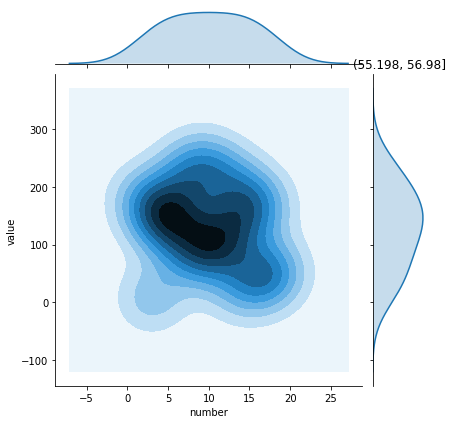

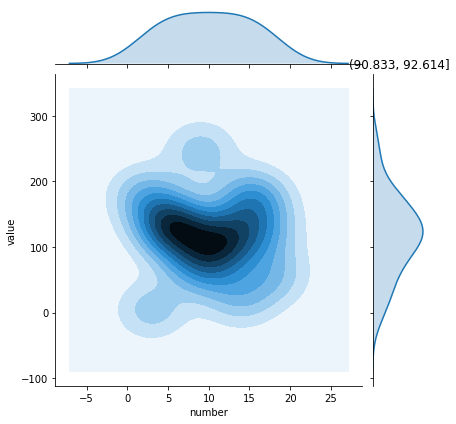

In [968]:

for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.jointplot(data=i, x='number',y='value', kind='kde')
        plt.title(j)

    
# g = sns.FacetGrid(results_mod, col='avg_elec_price_bin')
# g.map(sns.jointplot(x='number',y='value', kind='kde'))


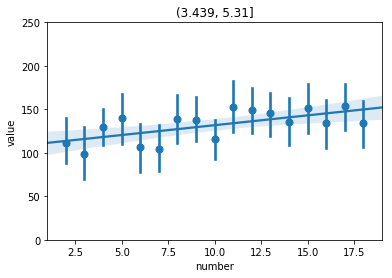

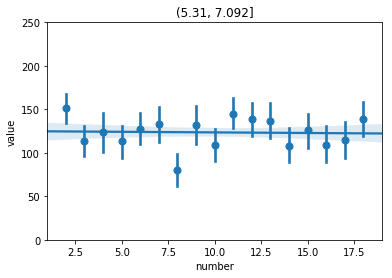

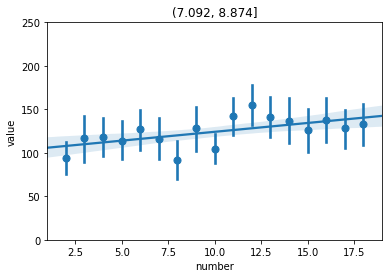

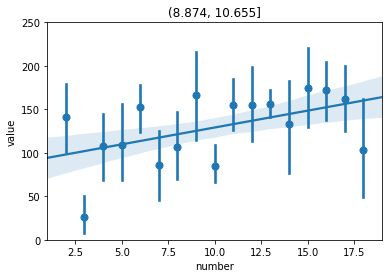

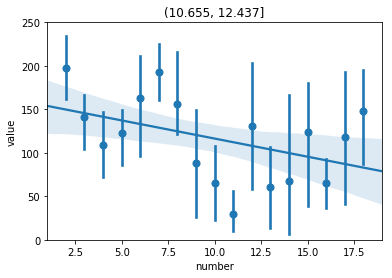

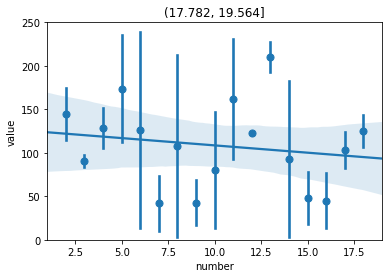

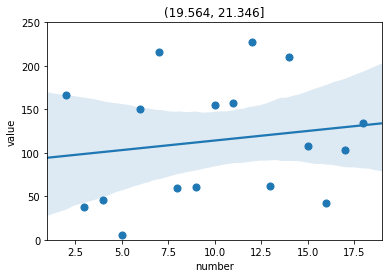

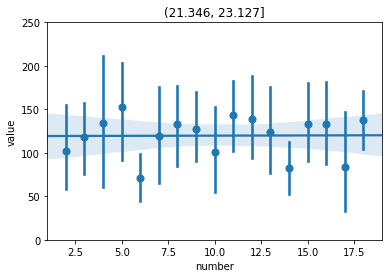

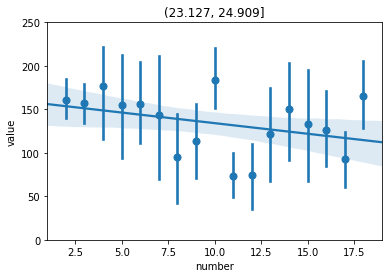

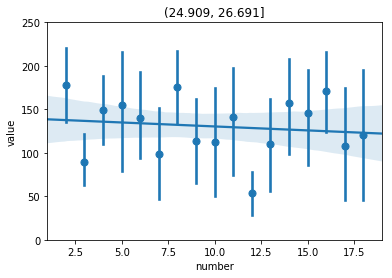

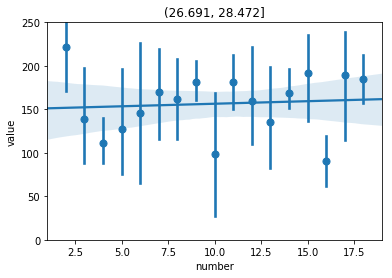

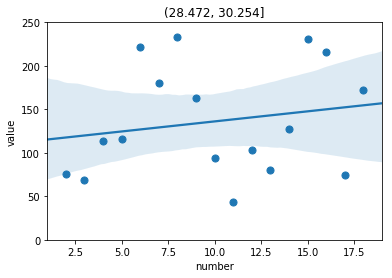

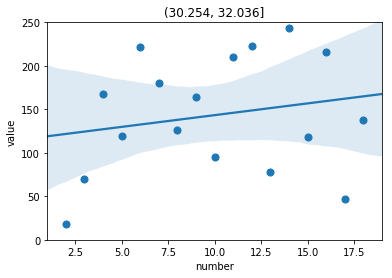

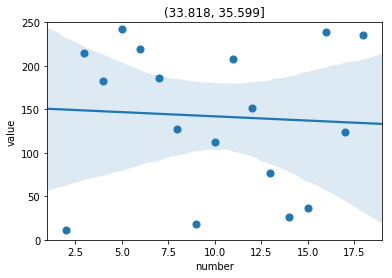

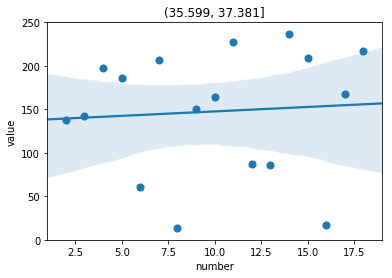

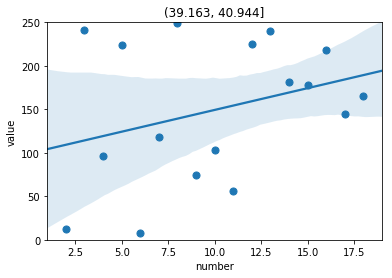

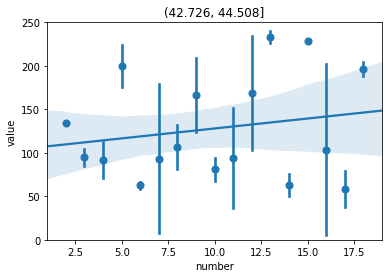

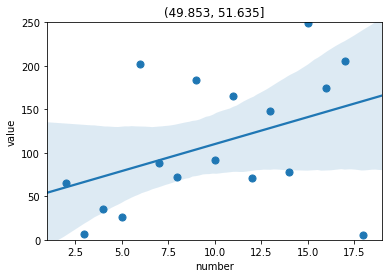

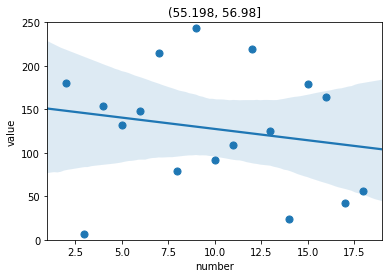

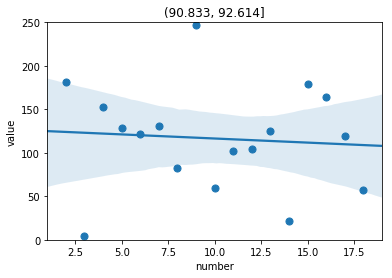

In [969]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        g = sns.regplot(data=i, x='number',y='value', x_estimator=np.mean)
        g.set(ylim=(0, 250))
        plt.title(j)
        plt.show()
        plt.close()

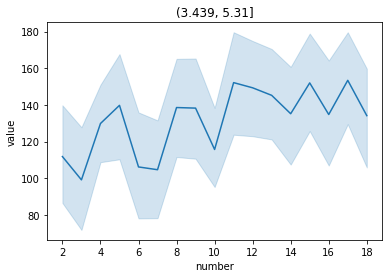

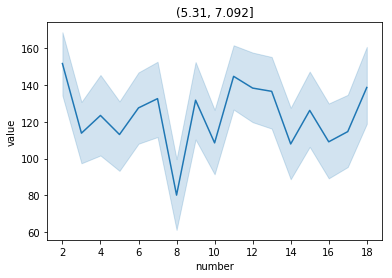

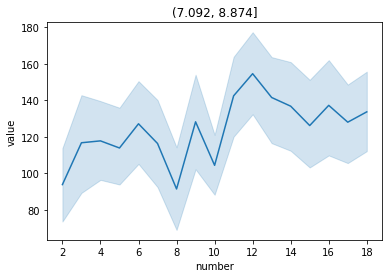

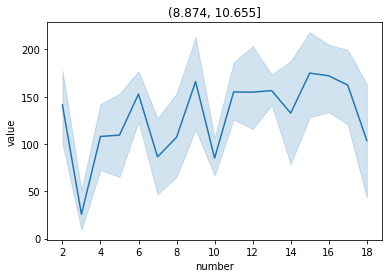

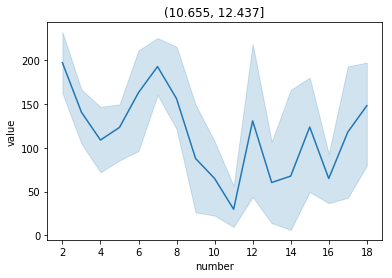

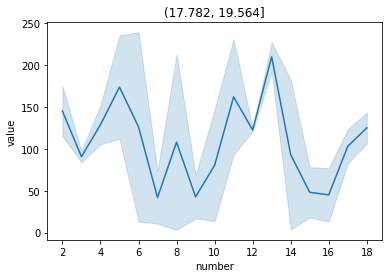

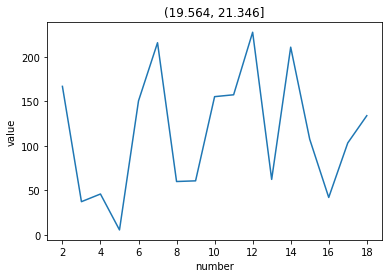

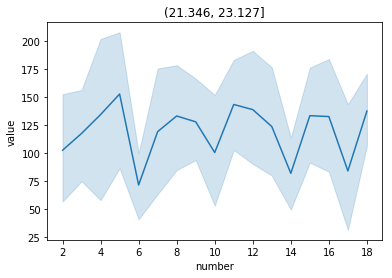

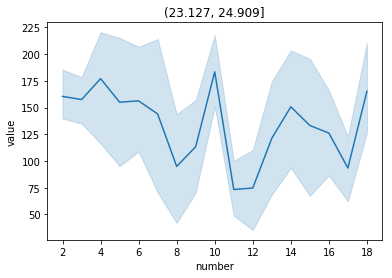

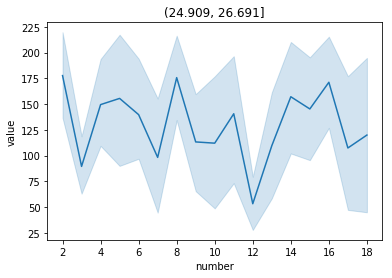

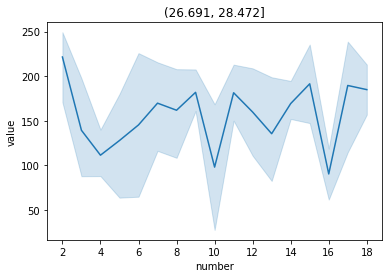

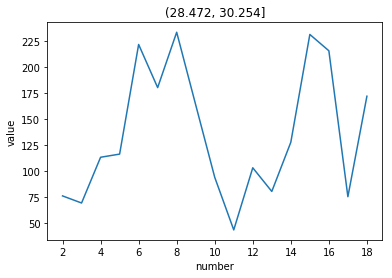

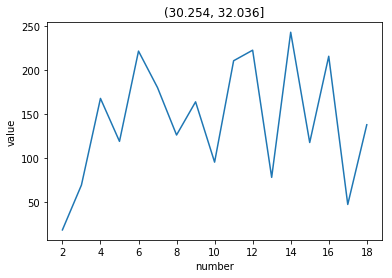

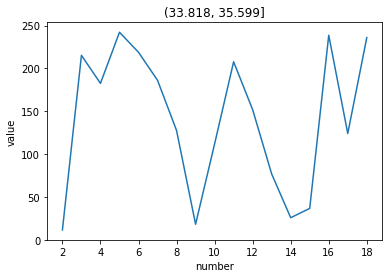

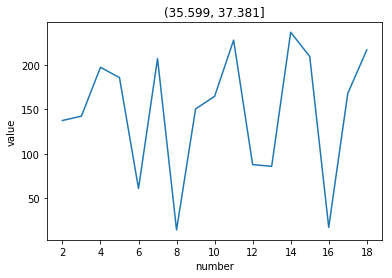

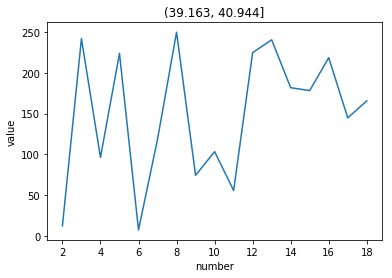

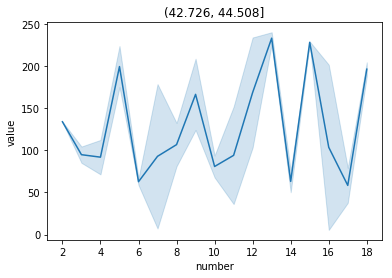

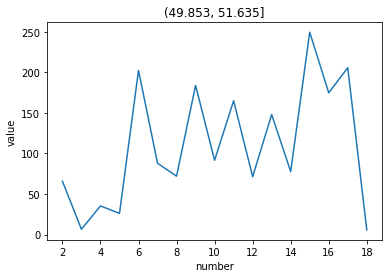

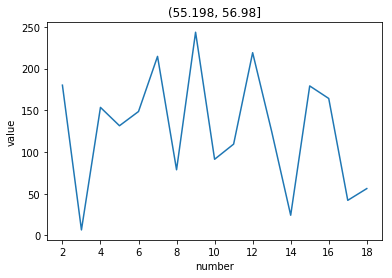

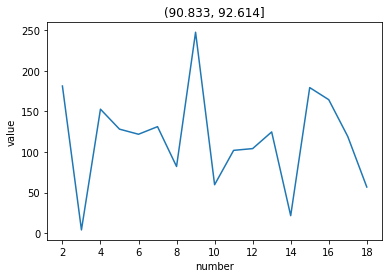

In [970]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.lineplot(data=i, x='number',y='value')
        plt.title(j)
        plt.show()
        plt.close()


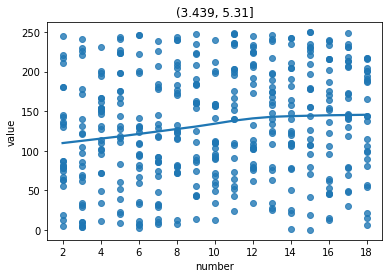

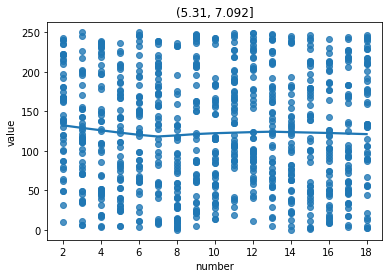

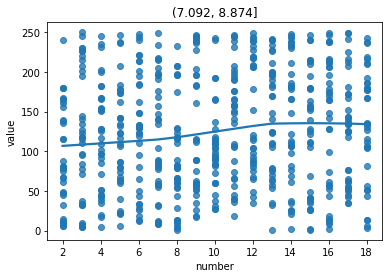

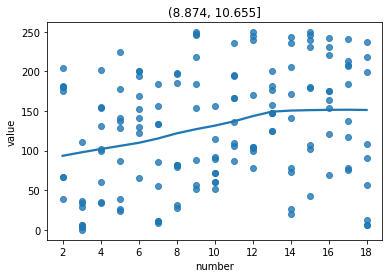

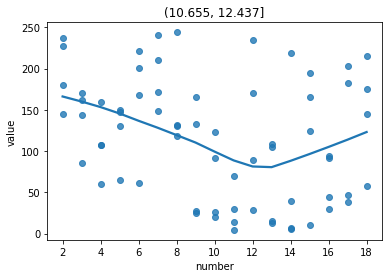

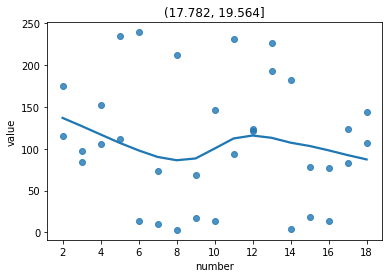

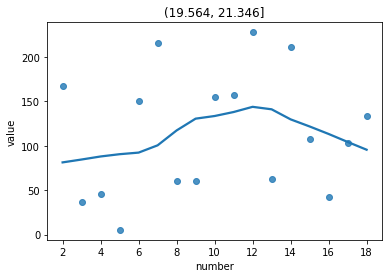

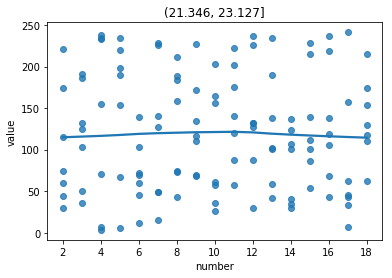

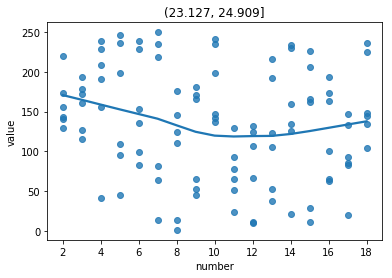

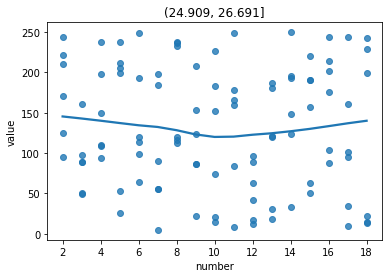

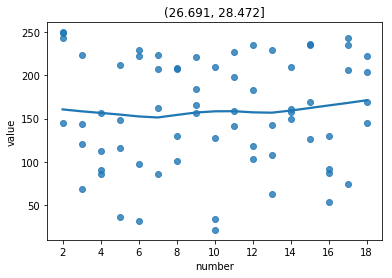

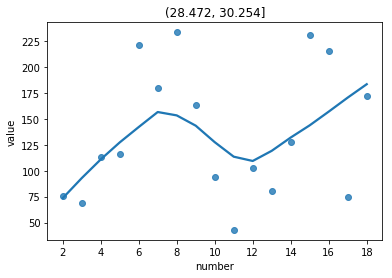

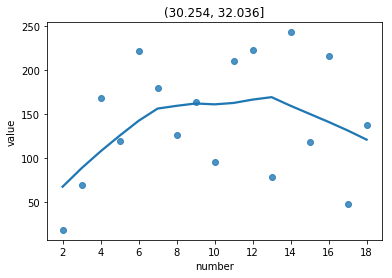

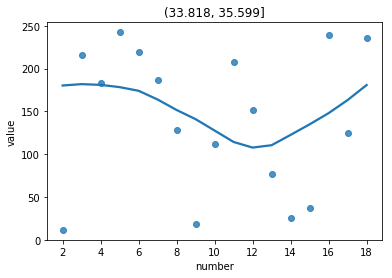

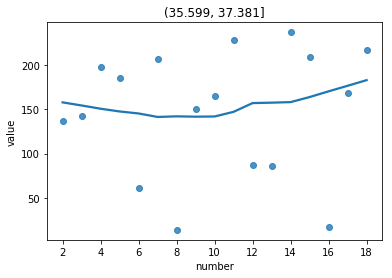

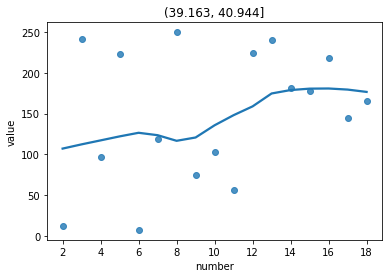

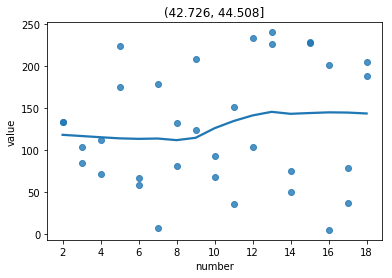

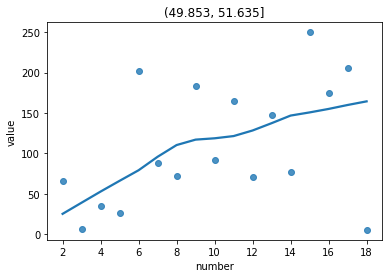

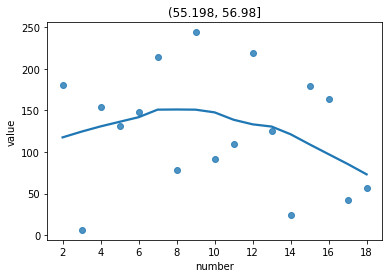

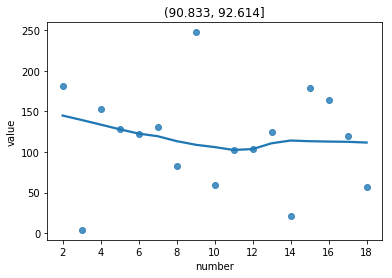

In [971]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.regplot(data=i, x='number',y='value', lowess=True)
        plt.title(j)
        plt.show()
        plt.close()

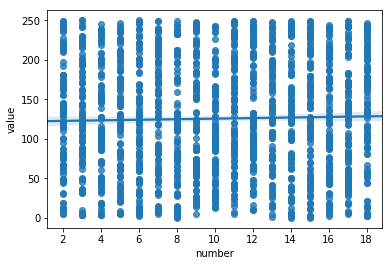

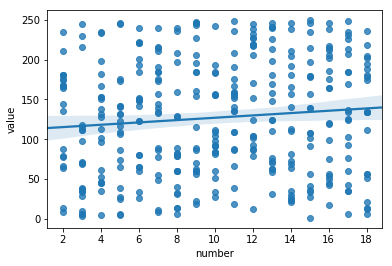

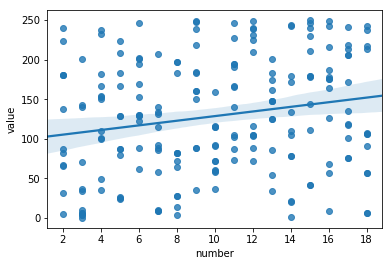

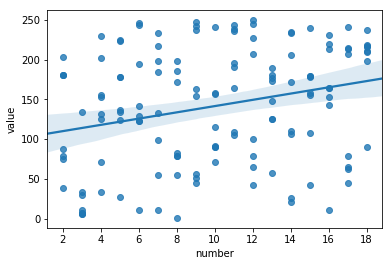

In [981]:
for j, i in results_mod.groupby('run_number'):
    sns.regplot(data=i, x='number',y='value')
    plt.show()
    plt.close()

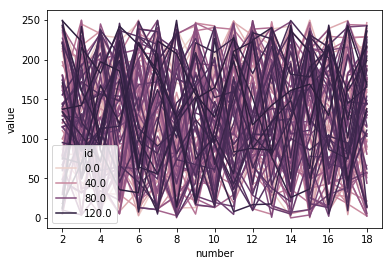

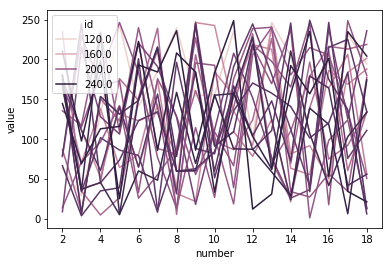

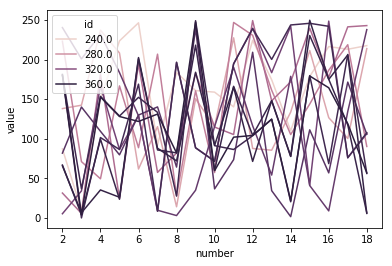

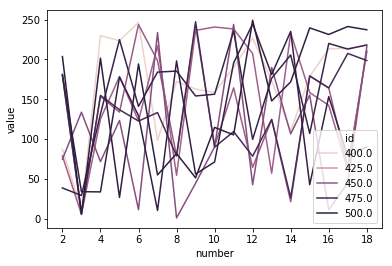

In [982]:
for j, i in results_mod.groupby('run_number'):
    sns.lineplot(data=i, x='number',y='value', hue='id')
    plt.show()
    plt.close()